<a href="https://colab.research.google.com/github/kavya06gupta/EDA_Project_1/blob/main/22BDS0044.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BCSE331L - Exploratory Data Analysis Course Project
## 22BDS0044 - Kavya Gupta
### Last updated - Review 1 [15/08/2025]

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
dataset_url = ' https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Hitters.csv'

try:
  df = pd.read_csv(dataset_url)
  print("Dataset loaded successfully\n")
  display(df.head())
  print(f"\nDataset shape: {df.shape}")
except Exception as e:
  print(f"An error occurred: {e}")
  print("Please ensure the link is correct and points to a valid CSV file.")

Dataset loaded successfully



AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N


Dataset shape: (322, 20)


## Exploring the dimensions of the dataset

In [ ]:
print("DATASET DIMENSIONS SUMMARY")
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Total data points: {df.size}")
print("\n\n")

print("COLUMN INFORMATION")
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print(df.info())
print("\n\n")

print("DATA TYPES SUMMARY")
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
dtype_counts = df.dtypes.value_counts()
print(dtype_counts)
print("\n\n")

print("COLUMN NAMES")
print(list(df.columns))

DATASET DIMENSIONS SUMMARY
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Number of rows: 322
Number of columns: 20
Total data points: 6440



COLUMN INFORMATION
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 

## Exploring the summary statistics of the dataset

In [ ]:
print("SUMMARY STATISTICS FOR NUMERICAL VARIABLES")
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(df[numerical_cols].describe())
print("\n\n")

print("SUMMARY STATISTICS FOR CATEGORICAL VARIABLES")
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

SUMMARY STATISTICS FOR NUMERICAL VARIABLES
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
            AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  322.000000  322.000000  322.000000  322.000000  322.000000  322.000000   
mean   380.928571  101.024845   10.770186   50.909938   48.027950   38.742236   
std    153.404981   46.454741    8.709037   26.024095   26.166895   21.639327   
min     16.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    255.250000   64.000000    4.000000   30.250000   28.000000   22.000000   
50%    379.500000   96.000000    8.000000   48.000000   44.000000   35.000000   
75%    512.000000  137.000000   16.000000   69.000000   64.750000   53.000000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

            Years       CAtBat        CHits      CHmRun        CRuns  \
count  322.000000    322.00000   322.000000  322.000000   322.000000   
mean     7.444099   2648.68323   717.57

In [ ]:
print("ADVANCED SUMMARY STATISTICS")
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=")
def advanced_stats(series):
    return {
        'count': series.count(),
        'mean': series.mean(),
        'median': series.median(),
        'mode': series.mode().iloc[0] if not series.mode().empty else np.nan,
        'std': series.std(),
        'var': series.var(),
        'skewness': series.skew(),
        'kurtosis': series.kurtosis(),
        'min': series.min(),
        'max': series.max(),
        'range': series.max() - series.min(),
        'iqr': series.quantile(0.75) - series.quantile(0.25),
        'cv': series.std() / series.mean() if series.mean() != 0 else np.nan
    }

advanced_stats_df = pd.DataFrame({col: advanced_stats(df[col]) for col in numerical_cols}).T
print(advanced_stats_df.round(3))

ADVANCED SUMMARY STATISTICS
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=
         count      mean  median   mode       std          var  skewness  \
AtBat    322.0   380.929   379.5  209.0   153.405    23533.088    -0.078   
Hits     322.0   101.025    96.0   53.0    46.455     2158.043     0.291   
HmRun    322.0    10.770     8.0    4.0     8.709       75.847     0.905   
Runs     322.0    50.910    48.0   42.0    26.024      677.254     0.416   
RBI      322.0    48.028    44.0   29.0    26.167      684.706     0.608   
Walks    322.0    38.742    35.0   22.0    21.639      468.260     0.620   
Years    322.0     7.444     6.0    4.0     4.926       24.266     0.780   
CAtBat   322.0  2648.683  1928.0   41.0  2324.206  5401932.927     1.227   
CHits    322.0   717.571   508.0  160.0   654.473   428334.420     1.356   
CHmRun   322.0    69.491    37.5   32.0    86.266     7441.833     2.163   
CRuns    322.0   358.795   247.0   20.0   334.106   111626.74

## Analysing the quality of data in our dataset

In [ ]:
print("DATA QUALITY ASSESSMENT")
print("=-=-=-=-=-=-=-=-=-=-=-=-=")

# Missing values analysis
print("Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Count', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0])

# Duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Data types consistency
print(f"\nData types:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")


DATA QUALITY ASSESSMENT
=-=-=-=-=-=-=-=-=-=-=-=-=
Missing Values Analysis:
        Missing_Count  Missing_Percentage
Salary             59           18.322981

Duplicate rows: 0

Data types:
AtBat: int64
Hits: int64
HmRun: int64
Runs: int64
RBI: int64
Walks: int64
Years: int64
CAtBat: int64
CHits: int64
CHmRun: int64
CRuns: int64
CRBI: int64
CWalks: int64
League: object
Division: object
PutOuts: int64
Assists: int64
Errors: int64
Salary: float64
NewLeague: object


Based on the data quality assessment, this baseball dataset demonstrates relatively good overall quality with 263 player records and no duplicate entries, which indicates clean data collection practices.

The most notable data quality concern is the missing salary information for 59 players (approximately 18% of the dataset), which is not uncommon in sports datasets as salary information can be confidential or unavailable for certain players, particularly those in minor leagues or with non-disclosure agreements.

The data types appear appropriate and consistent, with performance statistics correctly stored as integers and salary as a float to accommodate decimal values. The presence of both current season statistics (AtBat, Hits, etc.) and career statistics (CAtBat, CHits, etc.) suggests this is a comprehensive player performance dataset, likely from a specific season with historical context.

The categorical variables (League, Division, NewLeague) are properly formatted as objects, indicating good data type management during the data preparation process.

## Data Cleaning

In [ ]:
print("STEP 1 - HANDLING MISSING VALUES")
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

# Create a copy for cleaning
df_cleaned = df.copy()

# Strategy for handling missing values
for col in df_cleaned.columns:
    if df_cleaned[col].isnull().sum() > 0:
        if df_cleaned[col].dtype in ['int64', 'float64']:
            # For numerical columns, use median imputation
            median_val = df_cleaned[col].median()
            df_cleaned[col].fillna(median_val, inplace=True)
            print(f"Filled {col} missing values with median: {median_val:.2f}")
        else:
            # For categorical columns, use mode imputation
            mode_val = df_cleaned[col].mode()[0]
            df_cleaned[col].fillna(mode_val, inplace=True)
            print(f"Filled {col} missing values with mode: {mode_val}")

print(f"\nMissing values after cleaning: {df_cleaned.isnull().sum().sum()}")

STEP 1 - HANDLING MISSING VALUES
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Filled Salary missing values with median: 425.00

Missing values after cleaning: 0


In [ ]:
print("STEP 2 - OUTLIER DETECTION AND TREATMENT")
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

# Function to detect outliers using IQR method
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

# Function to detect outliers using Z-score method
def detect_outliers_zscore(series, threshold=3):
    z_scores = np.abs(stats.zscore(series))
    return z_scores > threshold

# Detect outliers for numerical columns
outlier_summary = {}
for col in numerical_cols:
    iqr_outliers = detect_outliers_iqr(df_cleaned[col]).sum()
    zscore_outliers = detect_outliers_zscore(df_cleaned[col]).sum()
    outlier_summary[col] = {
        'IQR_outliers': iqr_outliers,
        'ZScore_outliers': zscore_outliers,
        'IQR_percentage': (iqr_outliers / len(df_cleaned)) * 100,
        'ZScore_percentage': (zscore_outliers / len(df_cleaned)) * 100
    }

outlier_df = pd.DataFrame(outlier_summary).T
print("Outlier Summary:")
print(outlier_df.round(2))

STEP 2 - OUTLIER DETECTION AND TREATMENT
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Outlier Summary:
         IQR_outliers  ZScore_outliers  IQR_percentage  ZScore_percentage
AtBat             0.0              0.0            0.00               0.00
Hits              0.0              0.0            0.00               0.00
HmRun             2.0              1.0            0.62               0.31
Runs              1.0              1.0            0.31               0.31
RBI               1.0              0.0            0.31               0.00
Walks             1.0              1.0            0.31               0.31
Years             2.0              2.0            0.62               0.62
CAtBat            5.0              2.0            1.55               0.62
CHits             6.0              2.0            1.86               0.62
CHmRun           32.0              7.0            9.94               2.17
CRuns             5.0              2.0            1.55               0.62
CRBI      

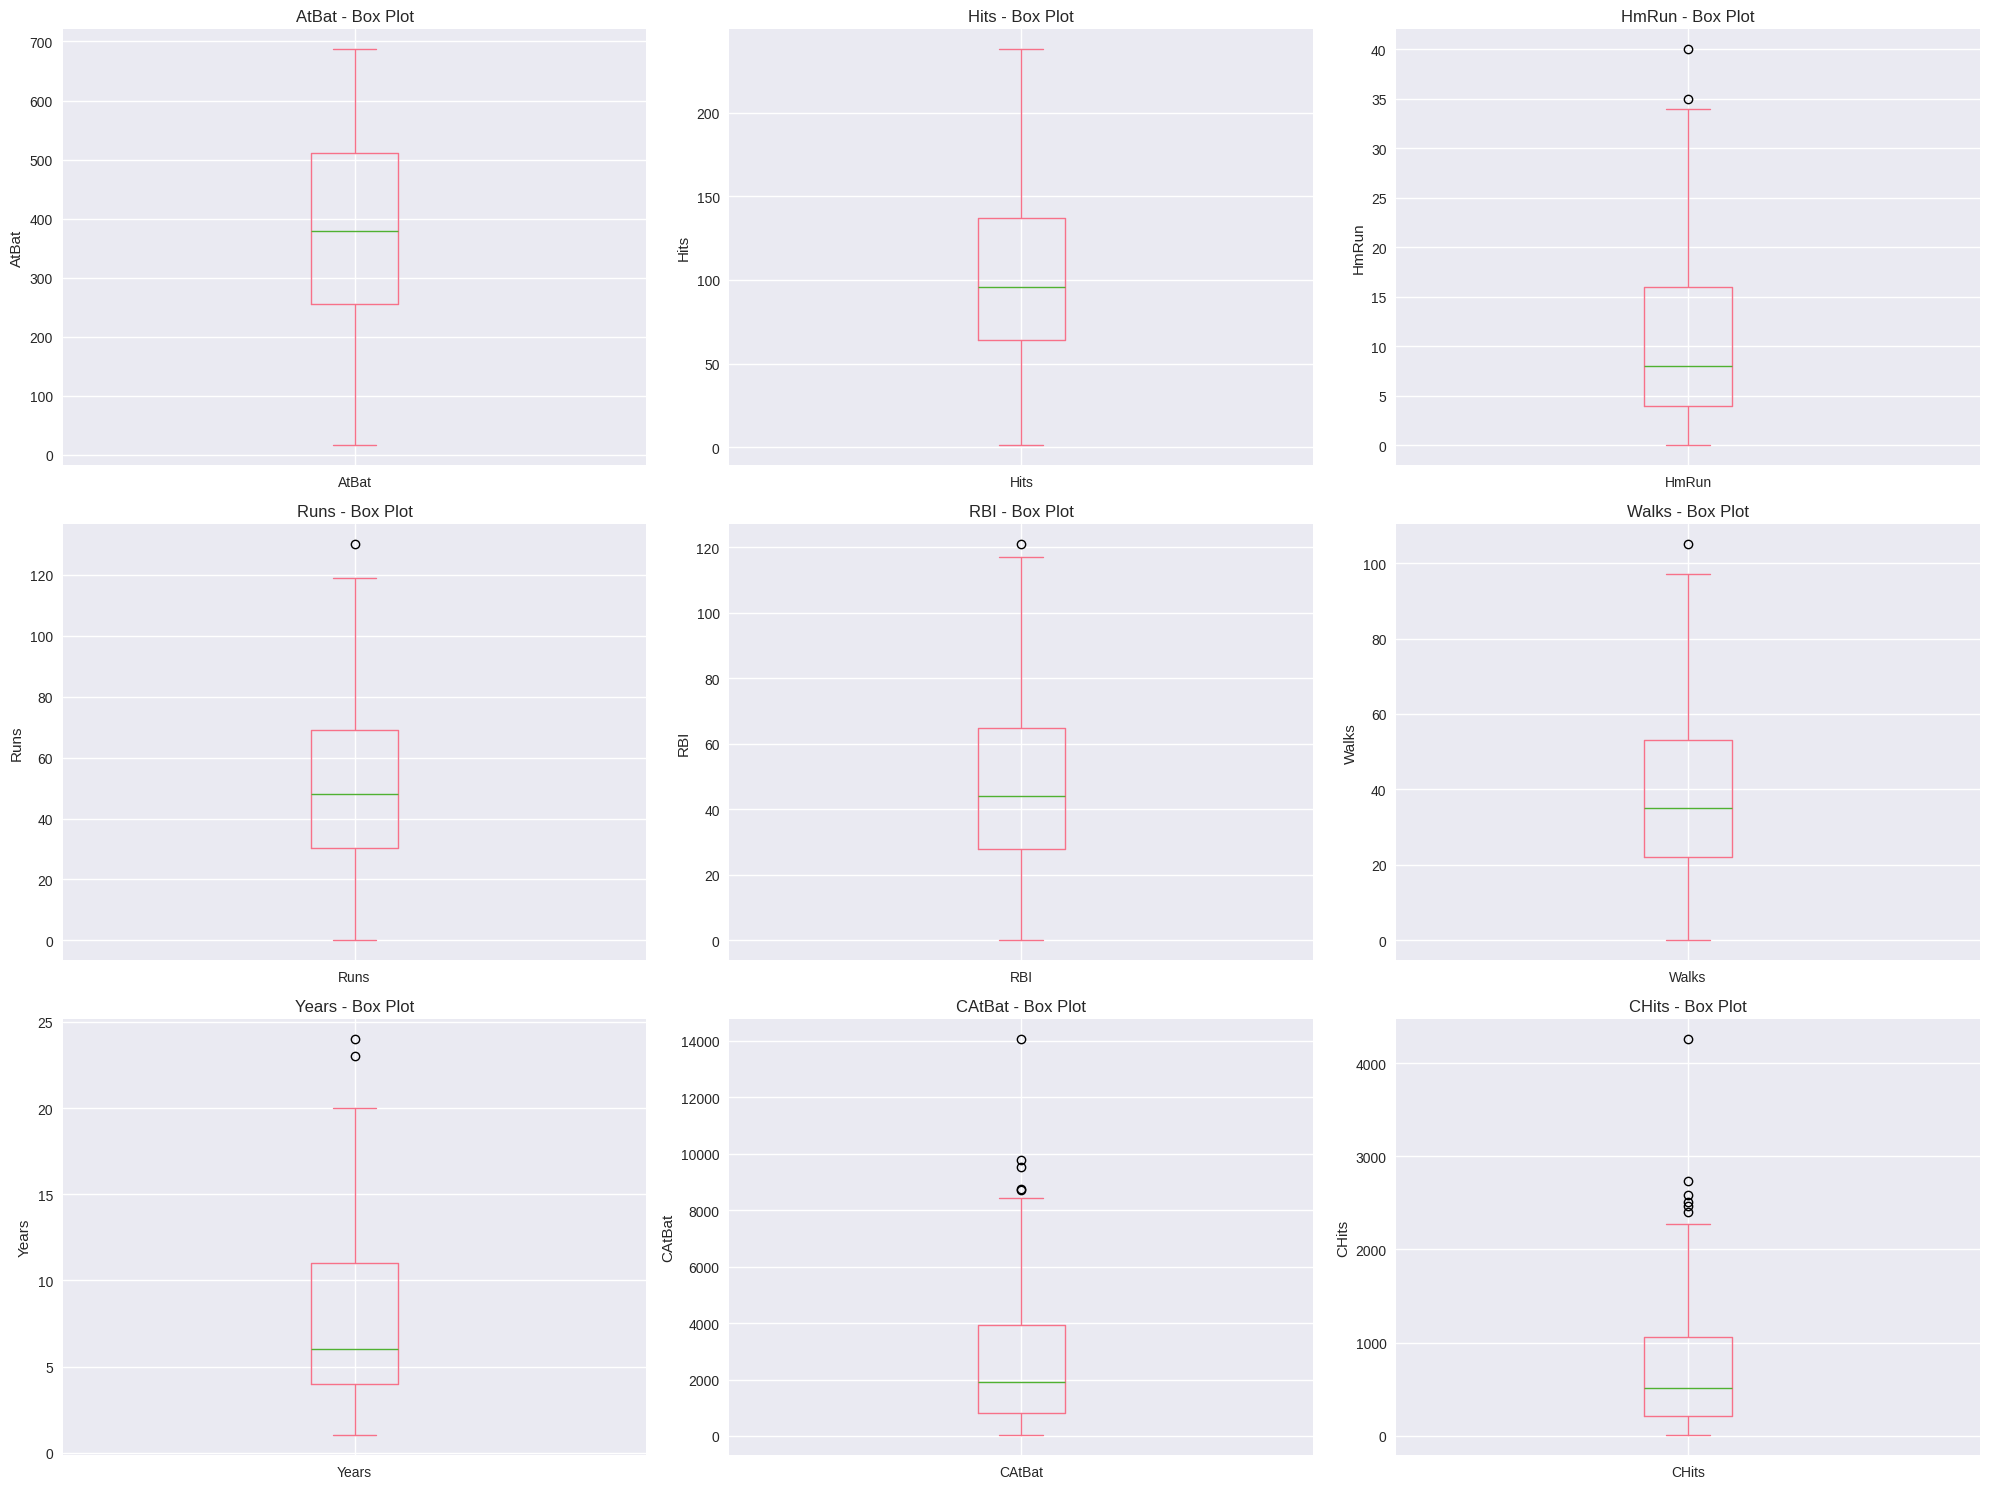

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:9]):
    # Box plot to visualize outliers by IQR method
    df_cleaned[col].plot(kind='box', ax=axes[i])
    axes[i].set_title(f'{col} - Box Plot')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

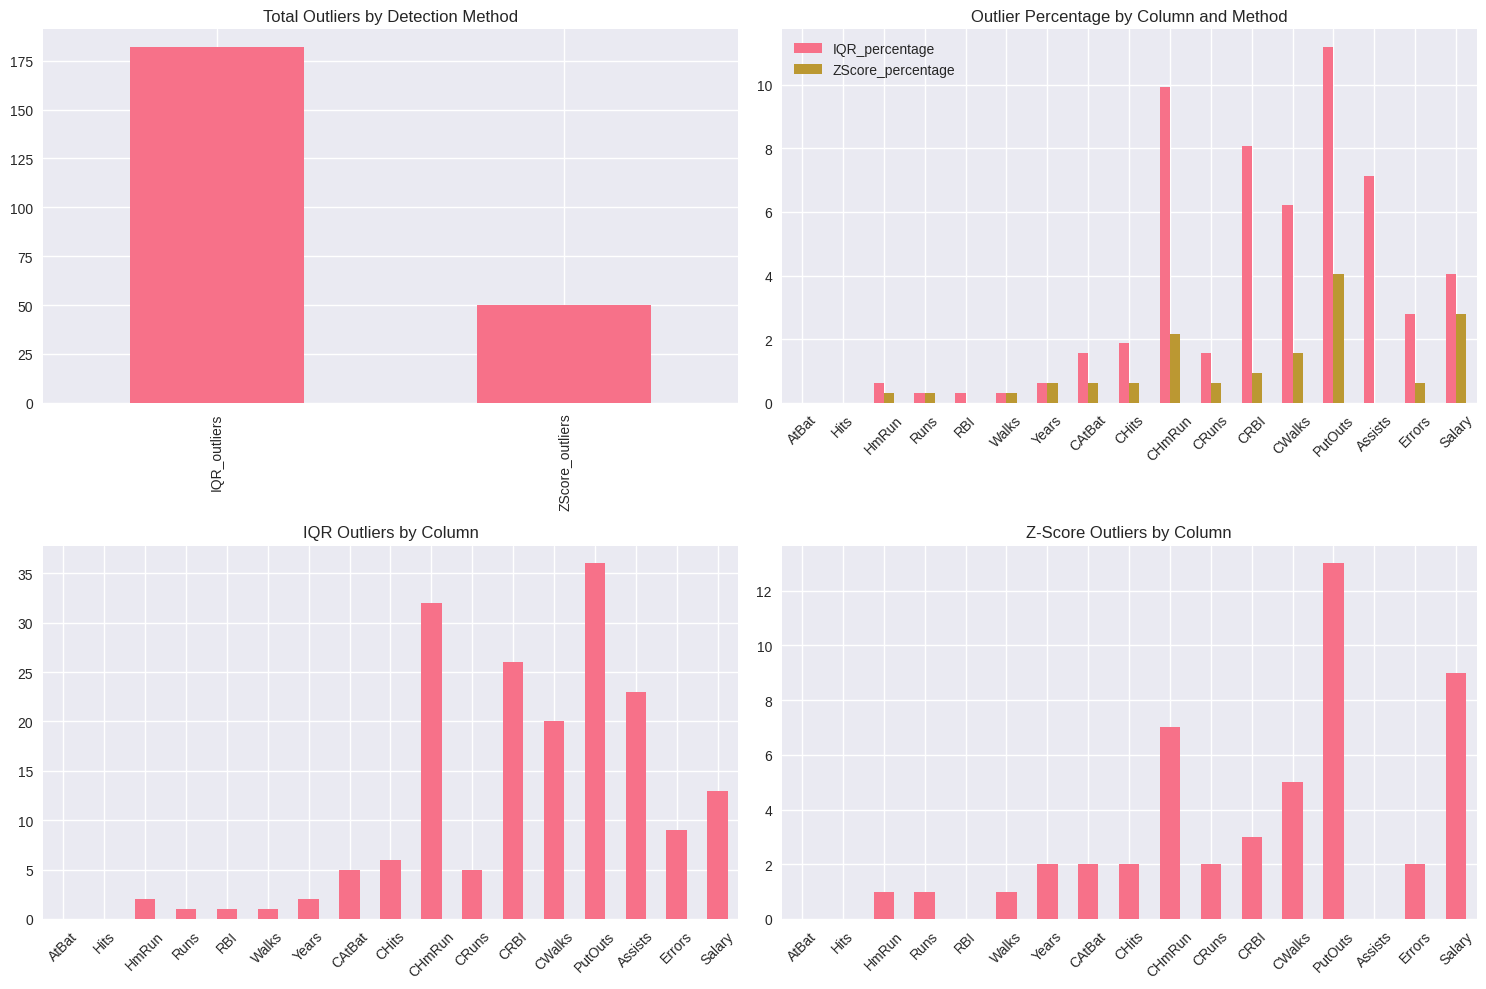

In [ ]:
# A comparison of outliers found by different methods (Z-score vs IQR)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

outlier_counts = outlier_df[['IQR_outliers', 'ZScore_outliers']].sum()
outlier_counts.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Total Outliers by Detection Method')

outlier_df[['IQR_percentage', 'ZScore_percentage']].plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Outlier Percentage by Column and Method')
axes[0,1].tick_params(axis='x', rotation=45)

outlier_df['IQR_outliers'].plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('IQR Outliers by Column')
axes[1,0].tick_params(axis='x', rotation=45)

outlier_df['ZScore_outliers'].plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Z-Score Outliers by Column')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Univariate Analysis

NUMERICAL VARIABLES


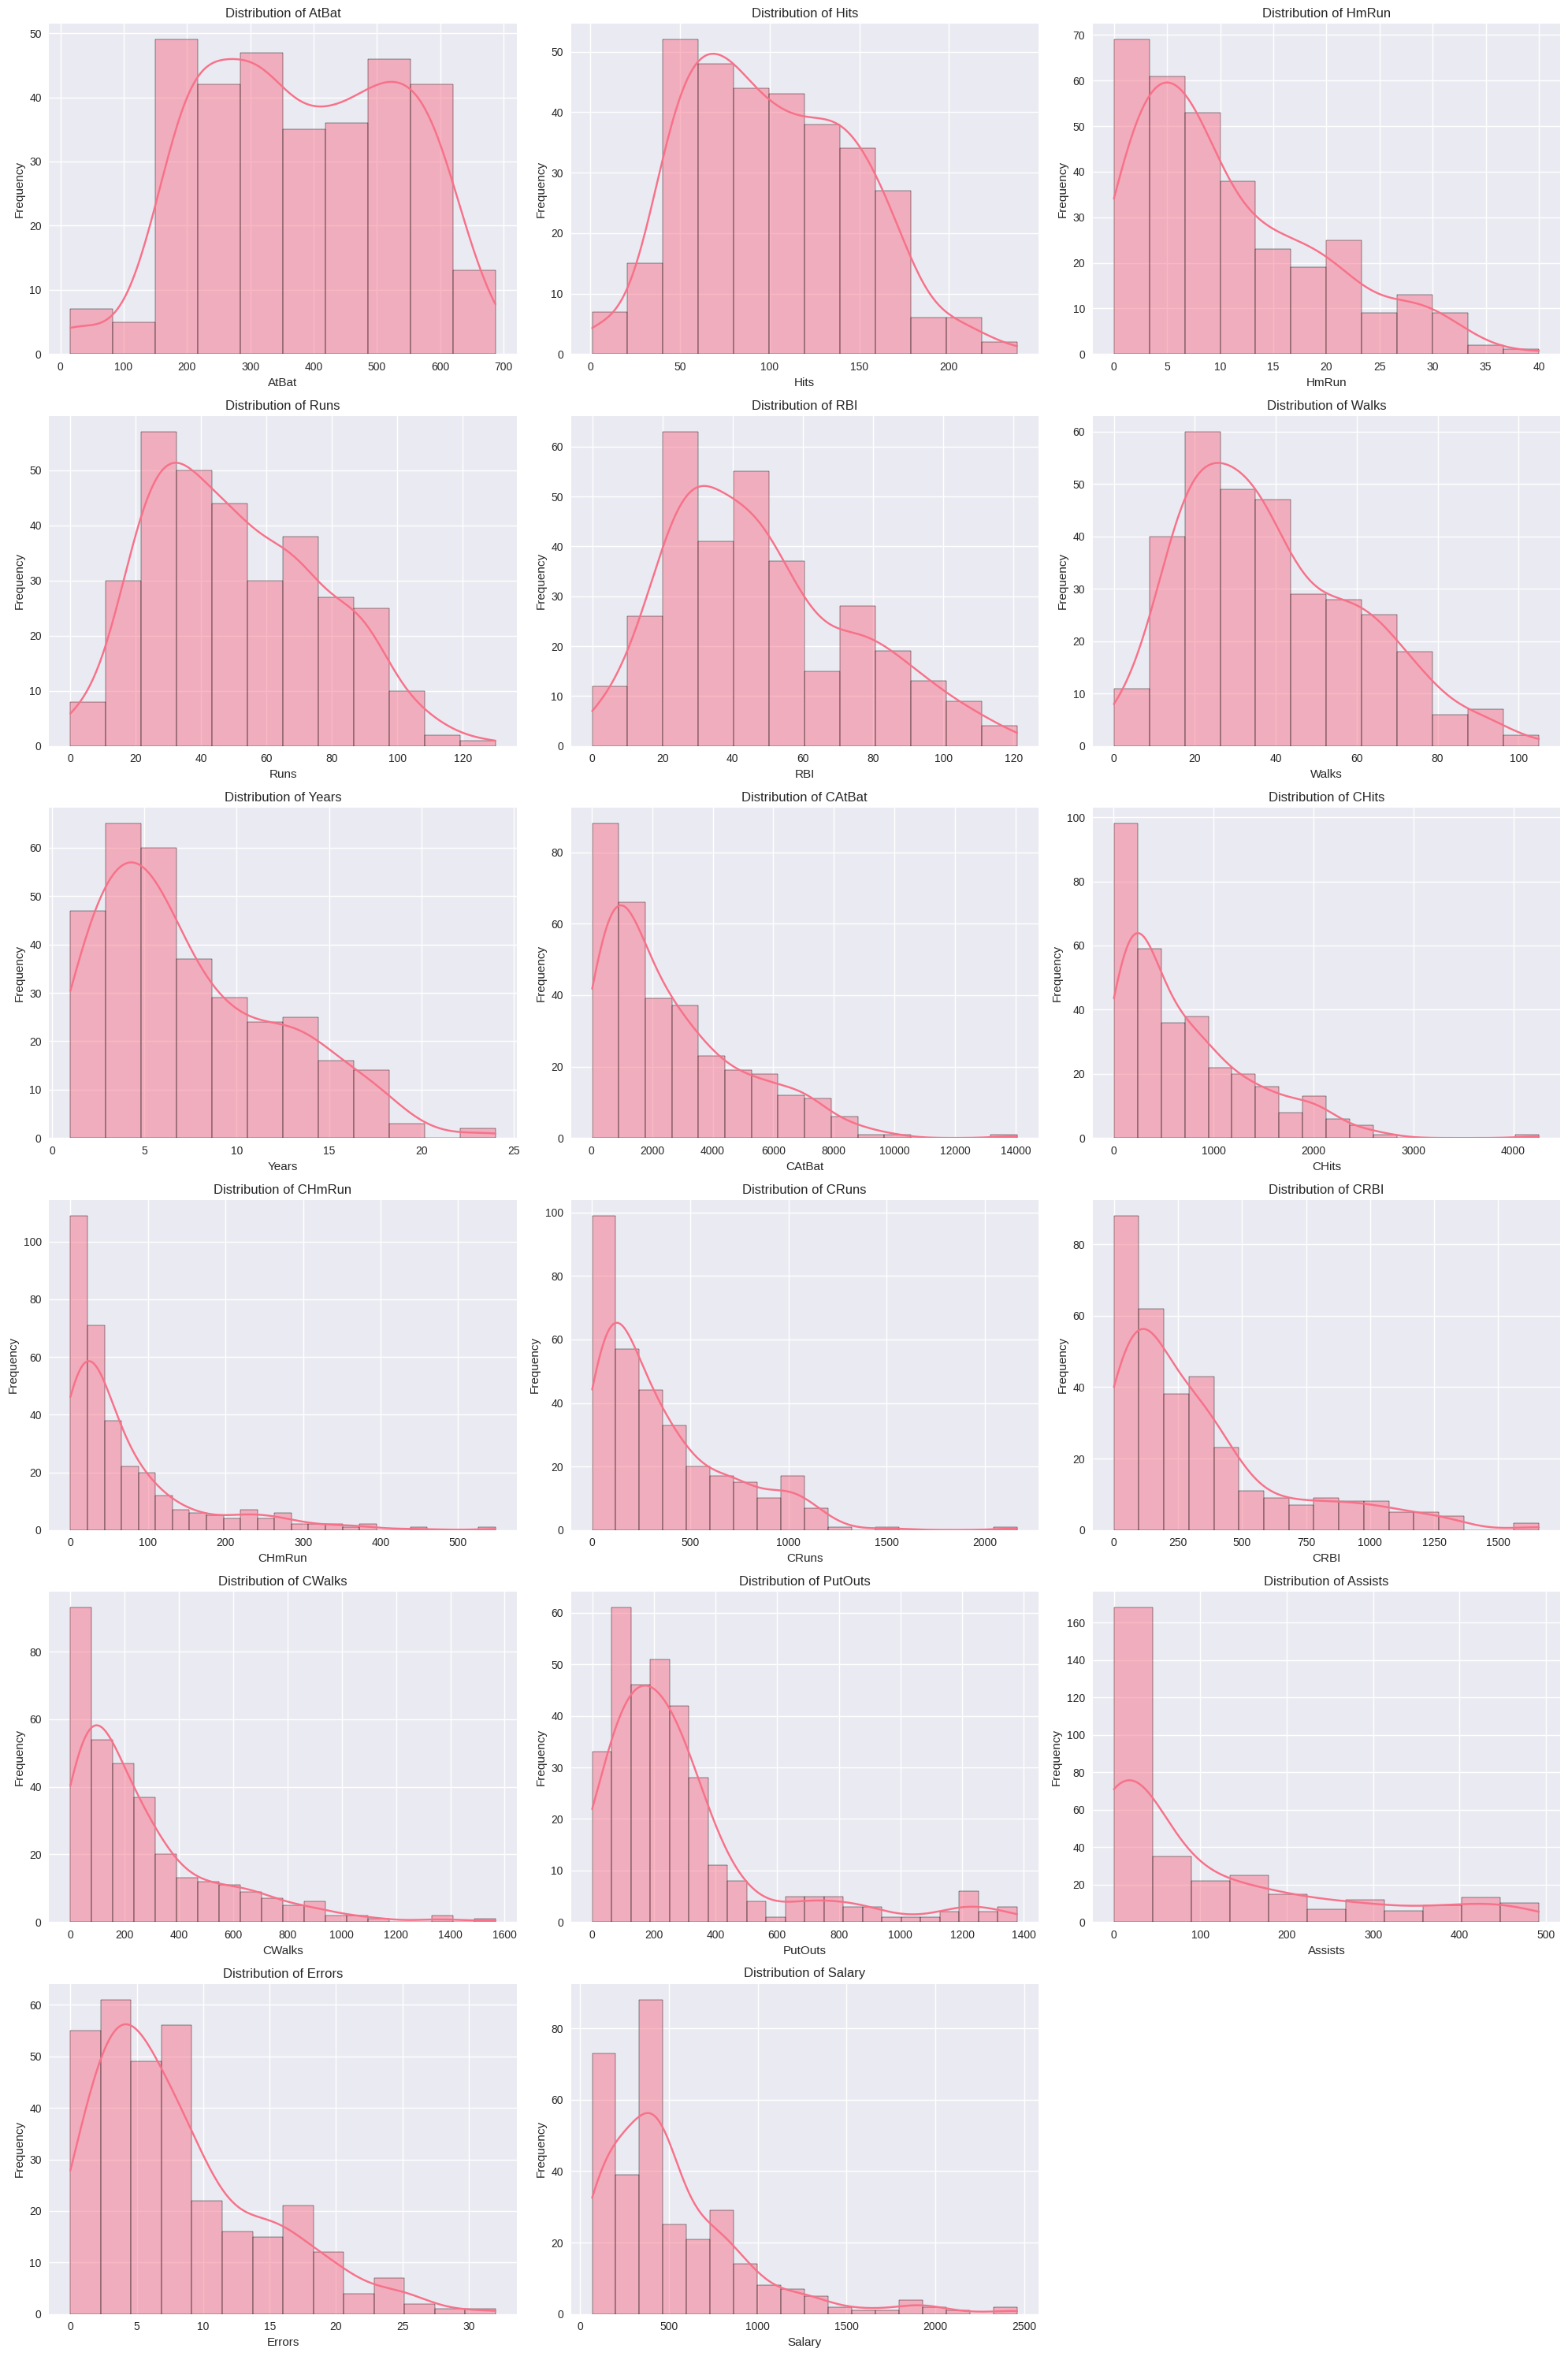

In [ ]:
print("NUMERICAL VARIABLES")

# Create subplots for distributions
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5*n_rows))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    # Histogram with KDE
    sns.histplot(data=df_cleaned, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
print("NORMALITY TESTS")
print("=-=-=-=-=-=-=-=-=-=-=-=")

normality_results = {}
for col in numerical_cols:
    # Shapiro-Wilk test (for small samples)
    if len(df_cleaned[col]) <= 5000:
        shapiro_stat, shapiro_p = stats.shapiro(df_cleaned[col])
    else:
        shapiro_stat, shapiro_p = np.nan, np.nan

    # Kolmogorov-Smirnov test
    ks_stat, ks_p = stats.kstest(df_cleaned[col], 'norm',
                                args=(df_cleaned[col].mean(), df_cleaned[col].std()))

    # Anderson-Darling test
    ad_result = stats.anderson(df_cleaned[col], dist='norm')

    normality_results[col] = {
        'Shapiro_stat': shapiro_stat,
        'Shapiro_p': shapiro_p,
        'KS_stat': ks_stat,
        'KS_p': ks_p,
        'AD_stat': ad_result.statistic,
        'AD_critical_5%': ad_result.critical_values[2]  # 5% significance level
    }

normality_df = pd.DataFrame(normality_results).T
print("Normality Test Results:")
print(normality_df.round(4))

NORMALITY TESTS
=-=-=-=-=-=-=-=-=-=-=-=
Normality Test Results:
         Shapiro_stat  Shapiro_p  KS_stat    KS_p  AD_stat  AD_critical_5%
AtBat          0.9702     0.0000   0.0700  0.0813   3.0598           0.778
Hits           0.9816     0.0004   0.0716  0.0703   2.0243           0.778
HmRun          0.9125     0.0000   0.1489  0.0000   8.8589           0.778
Runs           0.9730     0.0000   0.0836  0.0210   2.8554           0.778
RBI            0.9598     0.0000   0.0877  0.0133   4.3150           0.778
Walks          0.9599     0.0000   0.0884  0.0122   4.1661           0.778
Years          0.9268     0.0000   0.1495  0.0000   7.5439           0.778
CAtBat         0.8794     0.0000   0.1307  0.0000  11.6592           0.778
CHits          0.8680     0.0000   0.1378  0.0000  12.2180           0.778
CHmRun         0.7405     0.0000   0.2103  0.0000  26.9717           0.778
CRuns          0.8584     0.0000   0.1422  0.0000  13.7130           0.778
CRBI           0.8242     0.0000   0

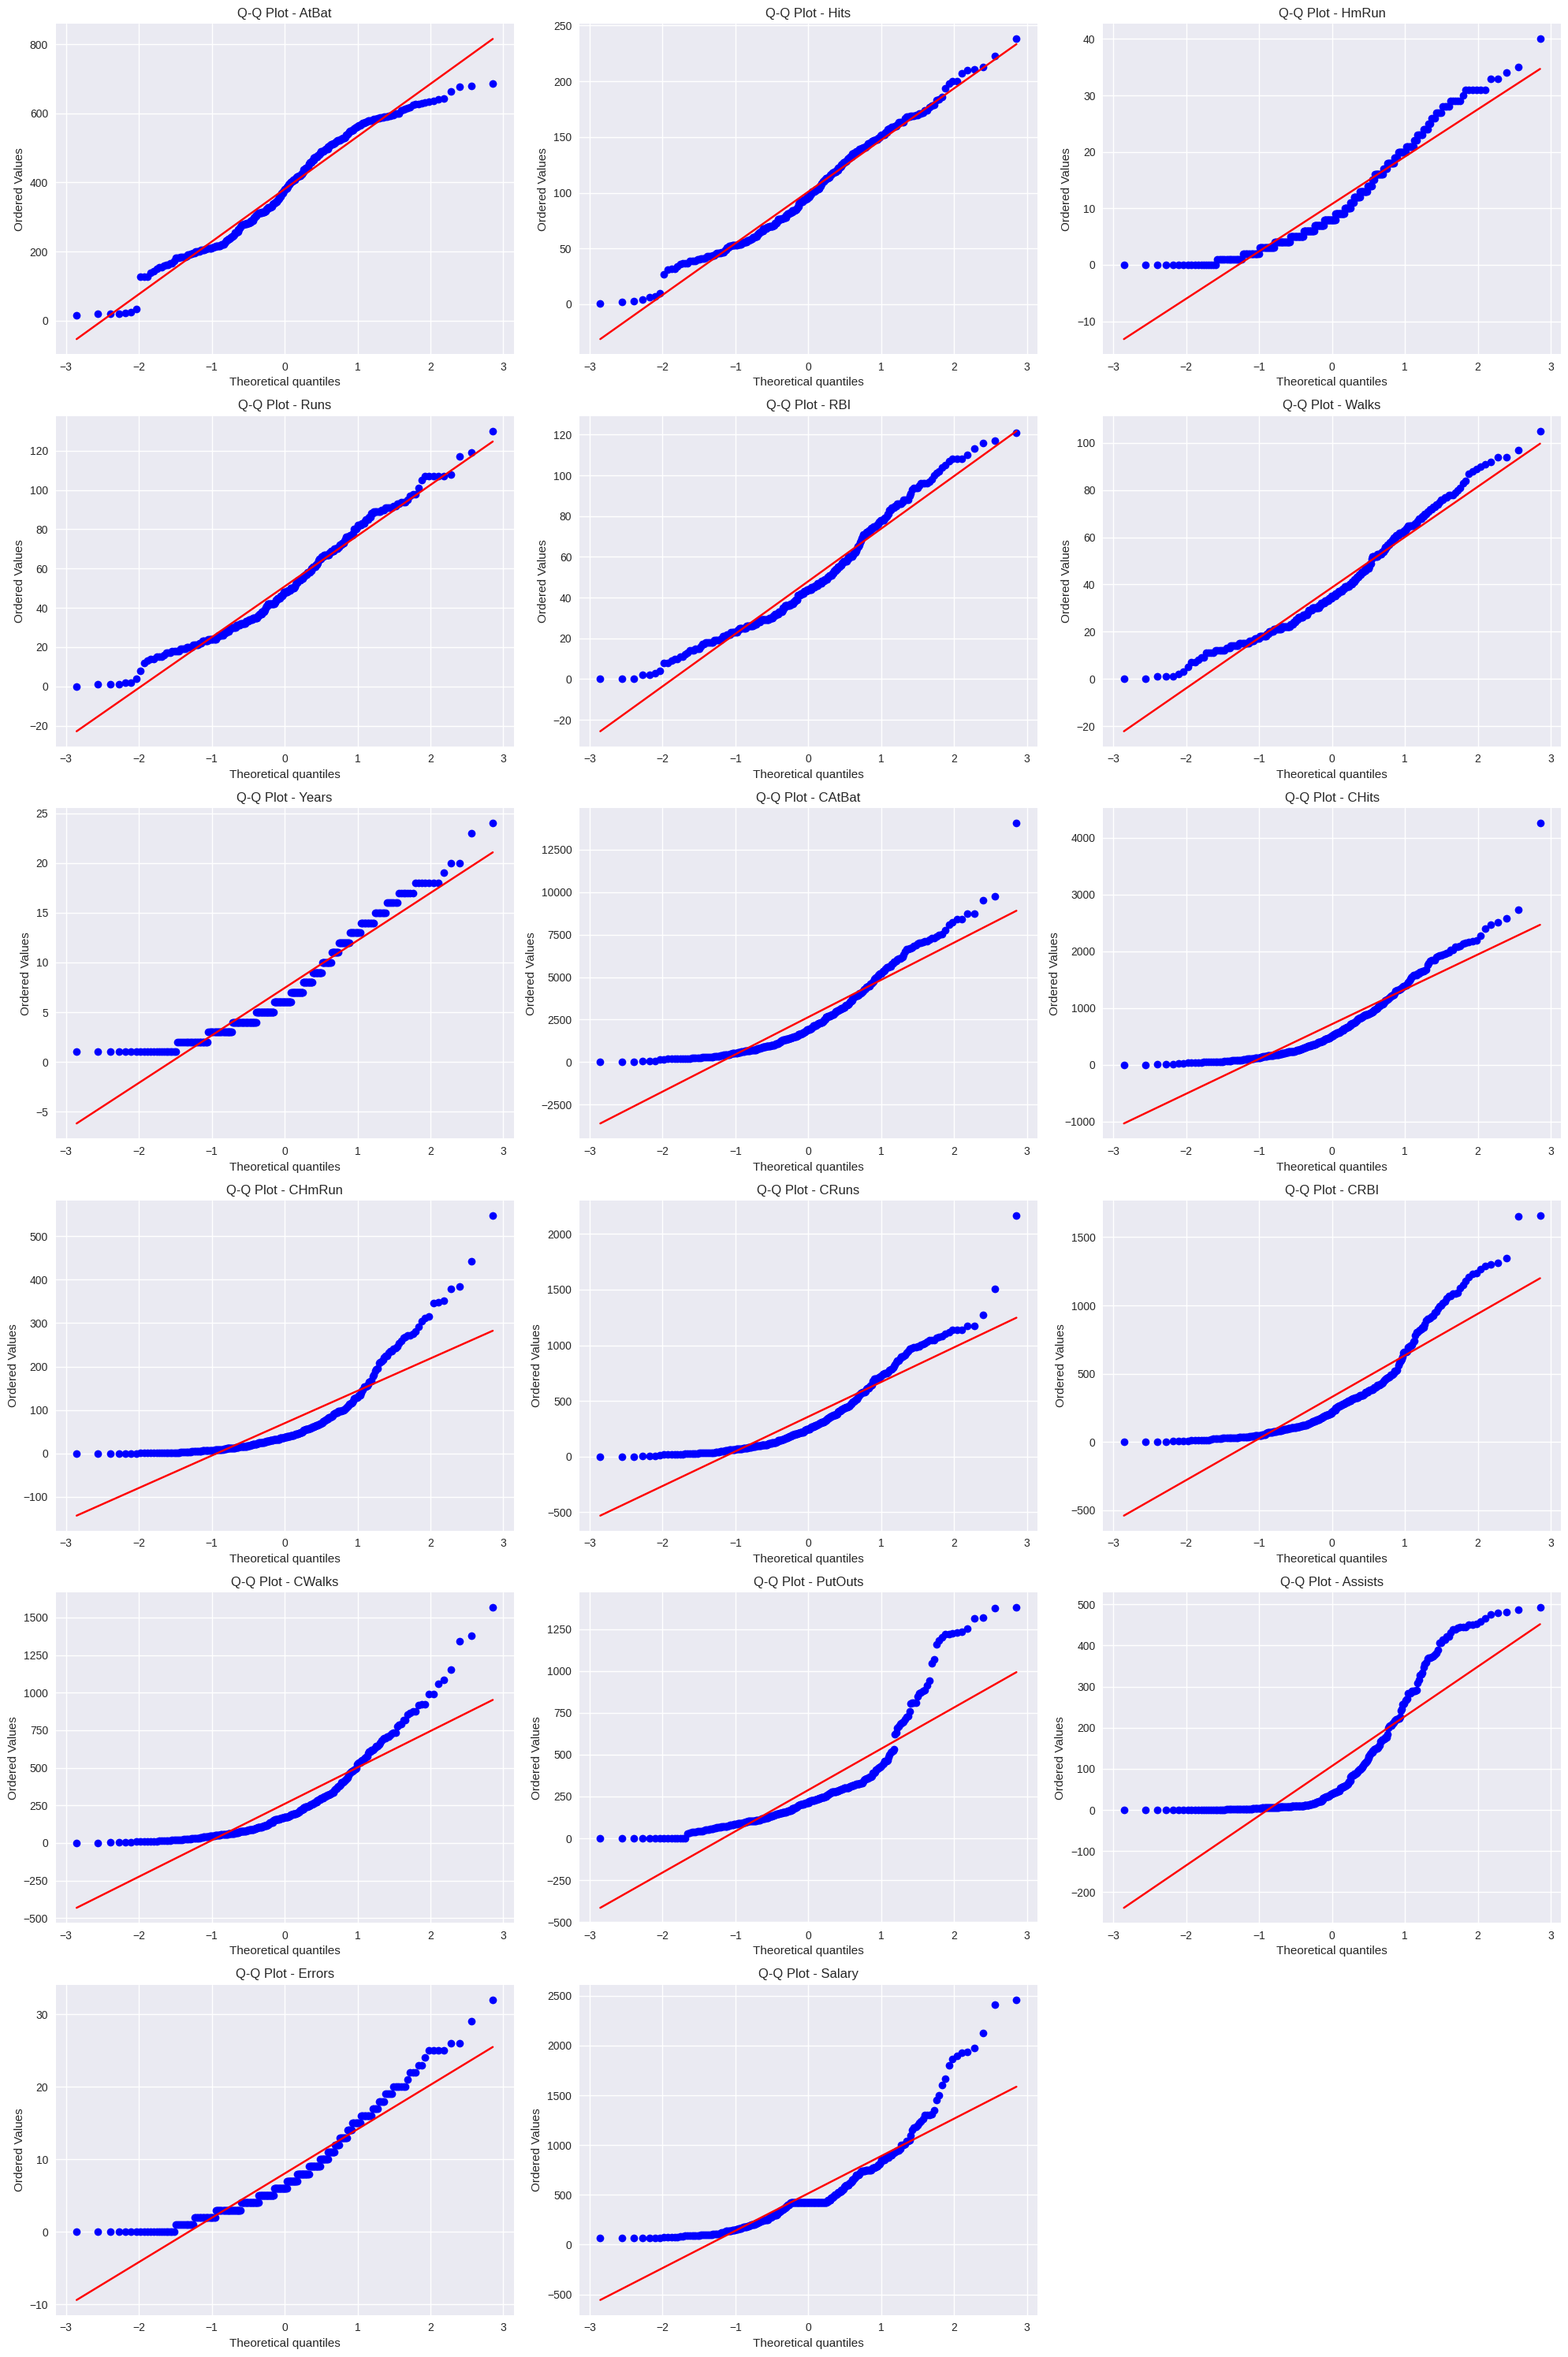

In [ ]:
# Q-Q plots
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5*n_rows))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    stats.probplot(df_cleaned[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot - {col}')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

CATEGORICAL VARIABLES


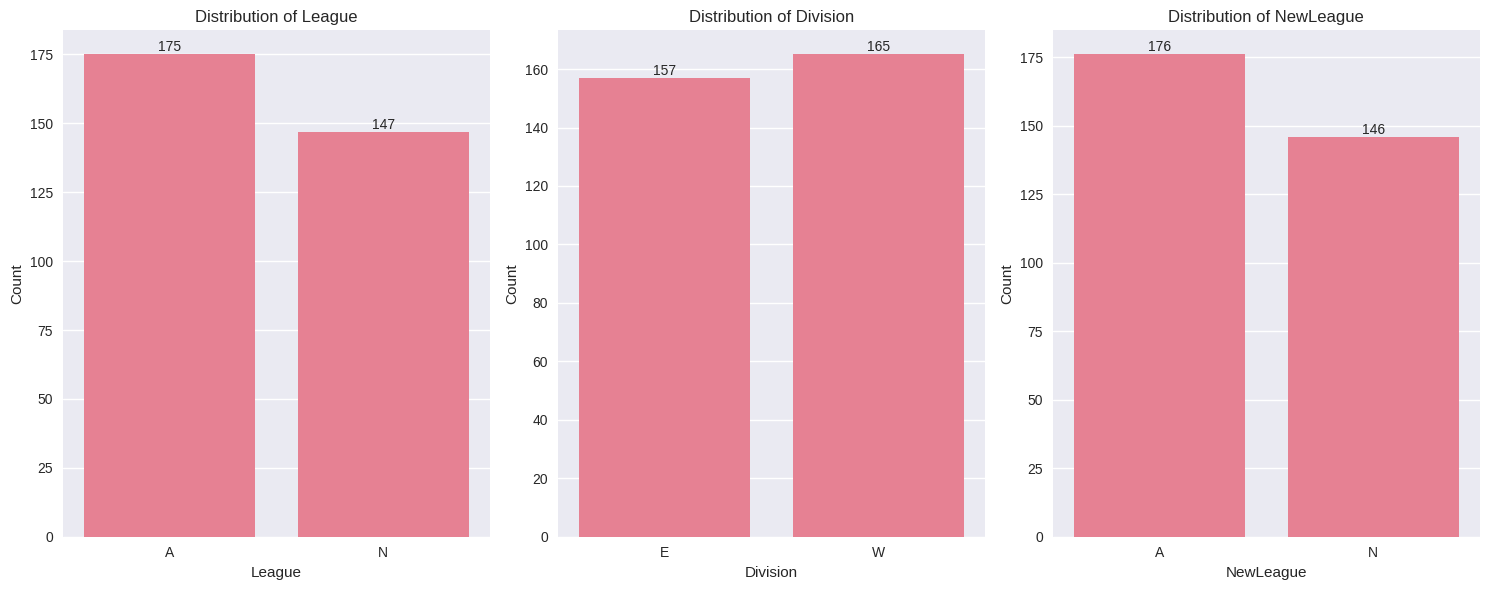

In [ ]:
print("CATEGORICAL VARIABLES")

fig, axes = plt.subplots(1, len(categorical_cols), figsize=(5*len(categorical_cols), 6))
if len(categorical_cols) == 1:
    axes = [axes]

for i, col in enumerate(categorical_cols):
    # Count plot
    sns.countplot(data=df_cleaned, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

    # Add value counts on bars
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width()/2., p.get_height()),
                        ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
for col in categorical_cols:
    print(f"\n=== {col} Analysis ===")
    value_counts = df_cleaned[col].value_counts()
    value_props = df_cleaned[col].value_counts(normalize=True) * 100

    summary_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_props
    })
    print(summary_df.round(2))


=== League Analysis ===
        Count  Percentage
League                   
A         175       54.35
N         147       45.65

=== Division Analysis ===
          Count  Percentage
Division                   
W           165       51.24
E           157       48.76

=== NewLeague Analysis ===
           Count  Percentage
NewLeague                   
A            176       54.66
N            146       45.34


## Bivariate Analysis

BIVARIATE ANALYSIS - CORRELATION ANALYSIS


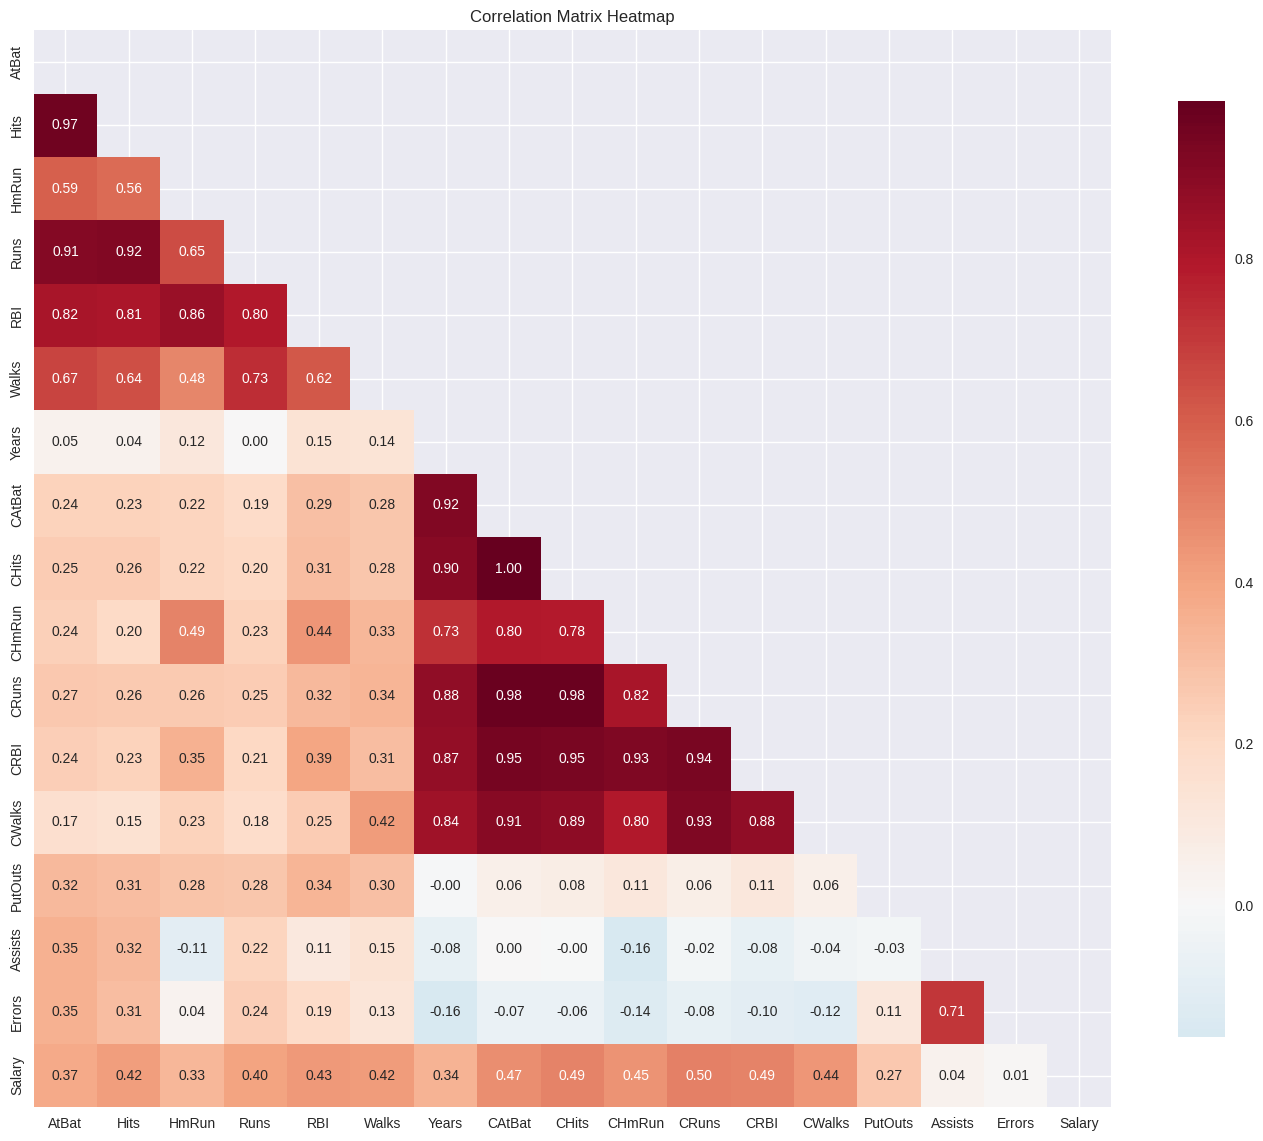

In [ ]:
print("BIVARIATE ANALYSIS - CORRELATION ANALYSIS")

# Calculate correlation matrix
correlation_matrix = df_cleaned[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
def find_high_correlations(corr_matrix, threshold=0.7):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                high_corr_pairs.append({
                    'Variable1': corr_matrix.columns[i],
                    'Variable2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    return pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)

high_corr = find_high_correlations(correlation_matrix, 0.7)
print("Highly Correlated Variable Pairs (|r| >= 0.7):")
print(high_corr)

Highly Correlated Variable Pairs (|r| >= 0.7):
   Variable1 Variable2  Correlation
14    CAtBat     CHits     0.995063
20     CHits     CRuns     0.984609
16    CAtBat     CRuns     0.983345
0      AtBat      Hits     0.967939
17    CAtBat      CRBI     0.949219
21     CHits      CRBI     0.945141
26     CRuns      CRBI     0.943769
24    CHmRun      CRBI     0.929484
27     CRuns    CWalks     0.927807
3       Hits      Runs     0.922187
8      Years    CAtBat     0.920289
1      AtBat      Runs     0.913060
18    CAtBat    CWalks     0.906501
9      Years     CHits     0.903631
22     CHits    CWalks     0.890954
28      CRBI    CWalks     0.884726
11     Years     CRuns     0.882877
12     Years      CRBI     0.868812
5      HmRun       RBI     0.855122
13     Years    CWalks     0.838533
2      AtBat       RBI     0.820539
23    CHmRun     CRuns     0.820243
4       Hits       RBI     0.811073
25    CHmRun    CWalks     0.799983
15    CAtBat    CHmRun     0.798836
6       Runs     

The correlation analysis reveals several intuitive and expected relationships within baseball performance metrics.

The strongest correlations exist among career statistics, which makes perfect sense since players who accumulate more career at-bats naturally tend to have more career hits, runs, and RBIs - this creates the near-perfect correlation (r=0.995) between career at-bats and career hits.

Similarly, current season performance metrics show strong relationships, with at-bats strongly correlating with hits (r=0.968), reflecting the fundamental baseball principle that more opportunities typically lead to more successes for consistent players.

The high correlation between years of experience and various career statistics (0.84-0.92) is logical, as veteran players have had more time to accumulate career numbers.

Interestingly, the moderate correlation between assists and errors (r=0.706) suggests that fielders who handle more chances (and thus record more assists) also tend to make more mistakes, which is a common pattern in baseball where more active defensive players face greater risk of errors.

SCATTER PLOTS


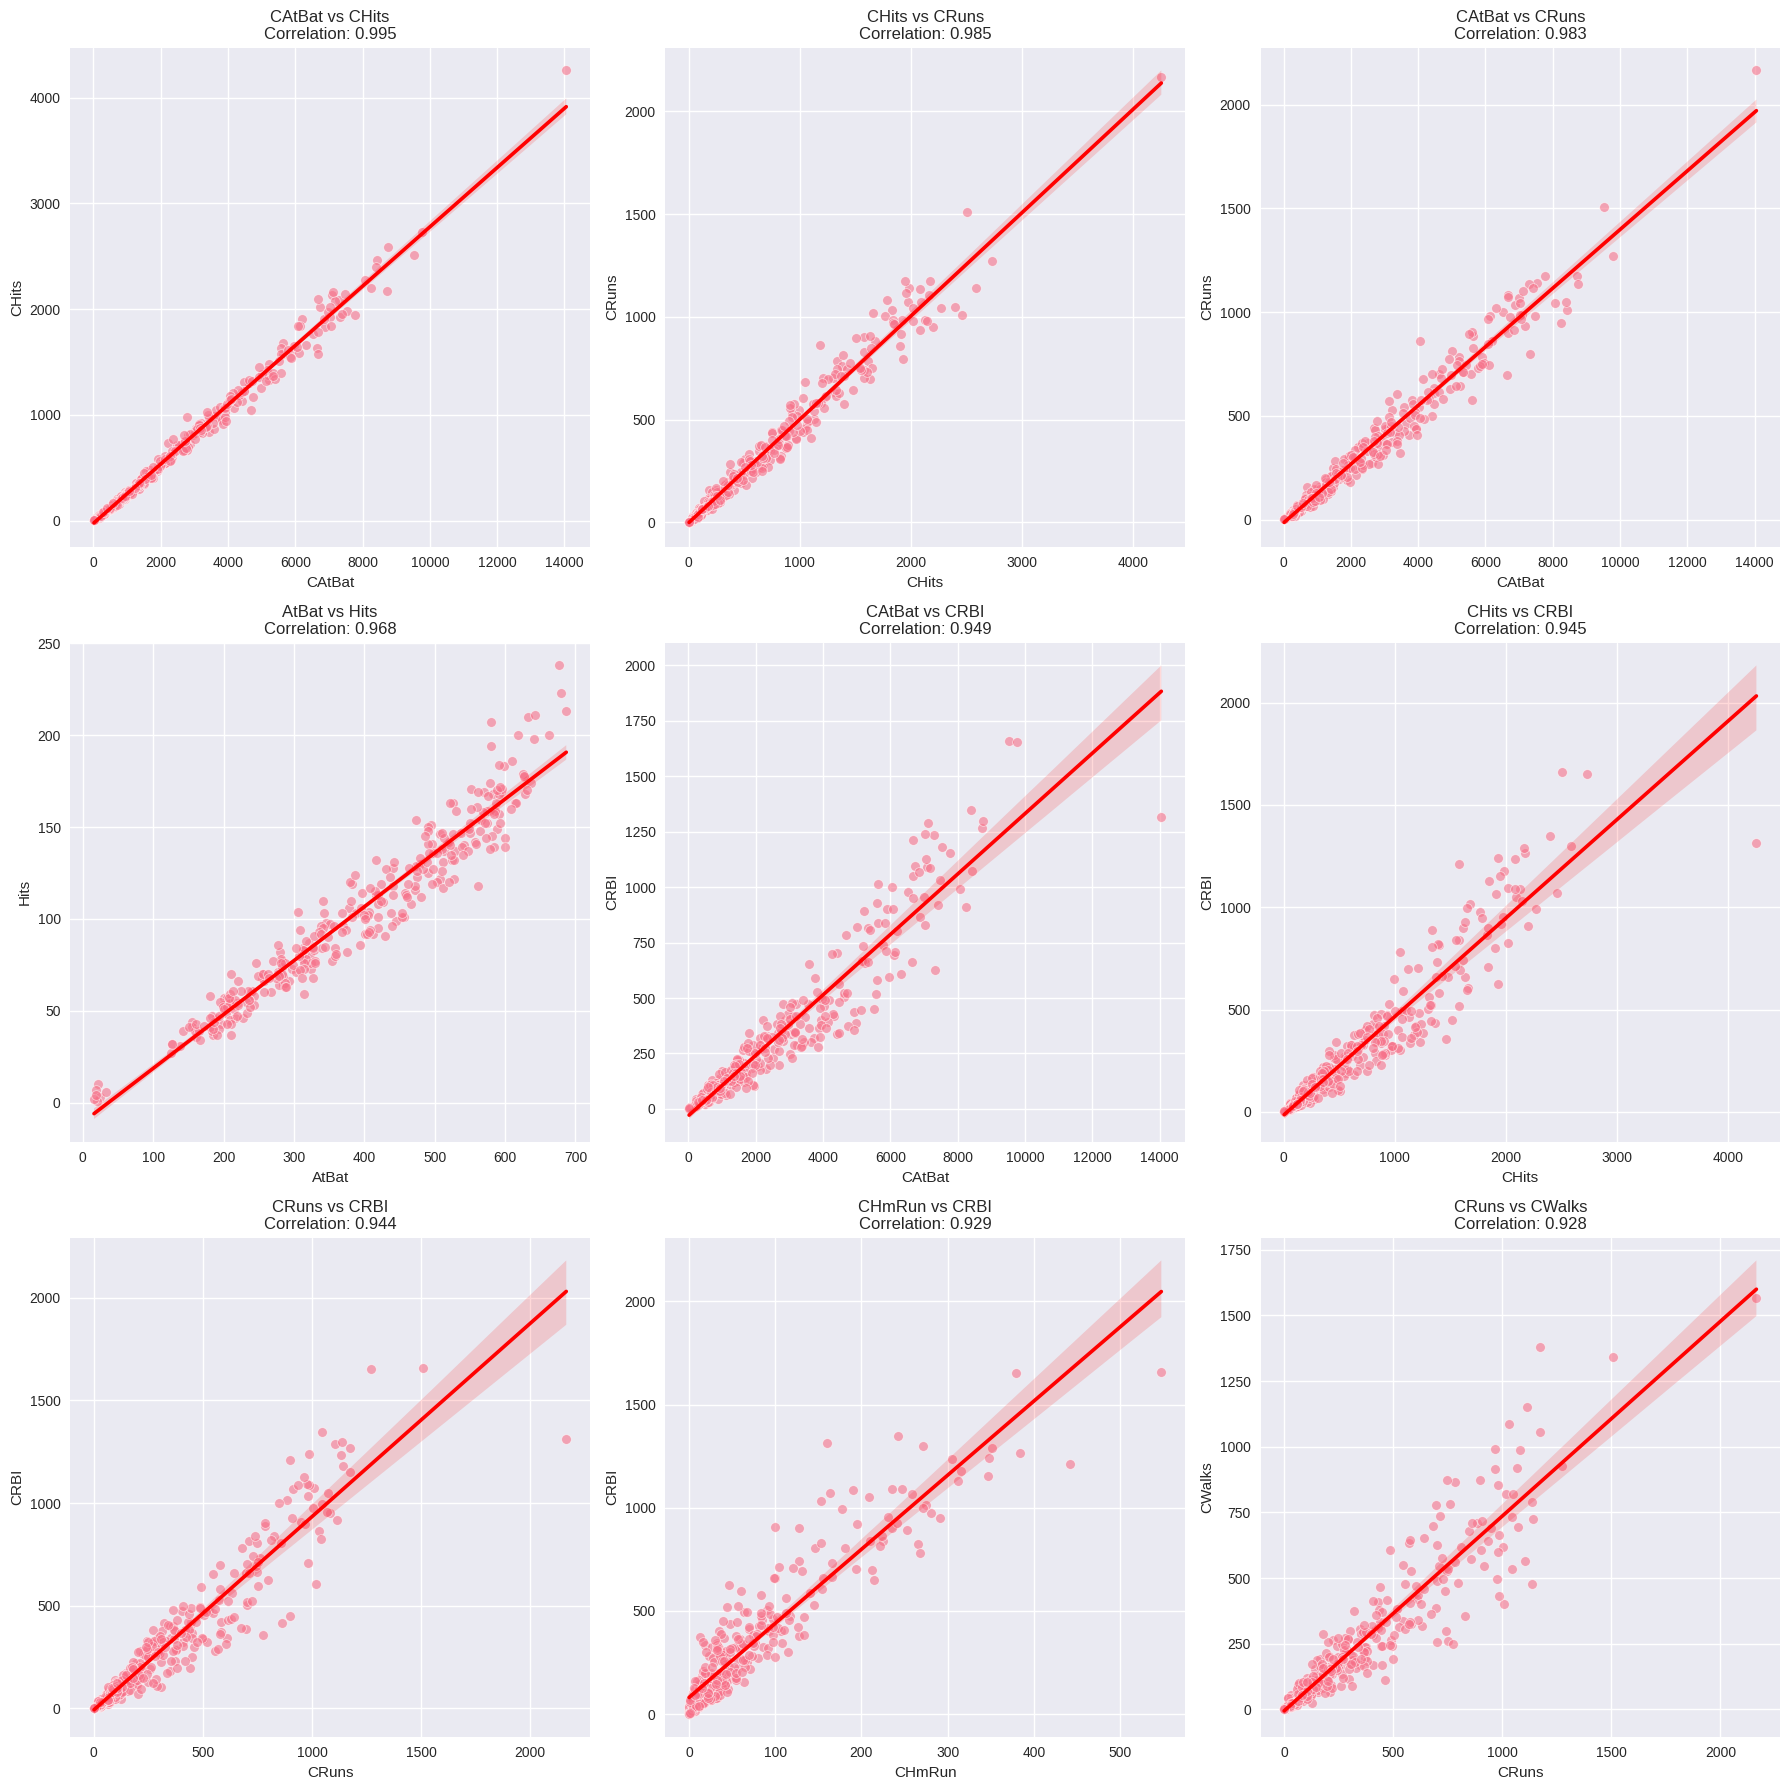

In [ ]:
print("SCATTER PLOTS")

# Create scatter plots for highly correlated variables
if len(high_corr) > 0:
    n_plots = min(len(high_corr), 9)
    n_rows = (n_plots + 2) // 3
    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6*n_rows))
    axes = axes.ravel() if n_rows > 1 else [axes] if n_plots == 1 else axes

    for i in range(n_plots):
        var1 = high_corr.iloc[i]['Variable1']
        var2 = high_corr.iloc[i]['Variable2']
        corr_val = high_corr.iloc[i]['Correlation']

        sns.scatterplot(data=df_cleaned, x=var1, y=var2, ax=axes[i], alpha=0.6)

        # Add regression line
        sns.regplot(data=df_cleaned, x=var1, y=var2, ax=axes[i],
                   scatter=False, color='red')

        axes[i].set_title(f'{var1} vs {var2}\nCorrelation: {corr_val:.3f}')

    # Remove empty subplots
    for j in range(n_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


BIVARIATE ANALYSIS - NUMERICAL vs CATEGORICAL


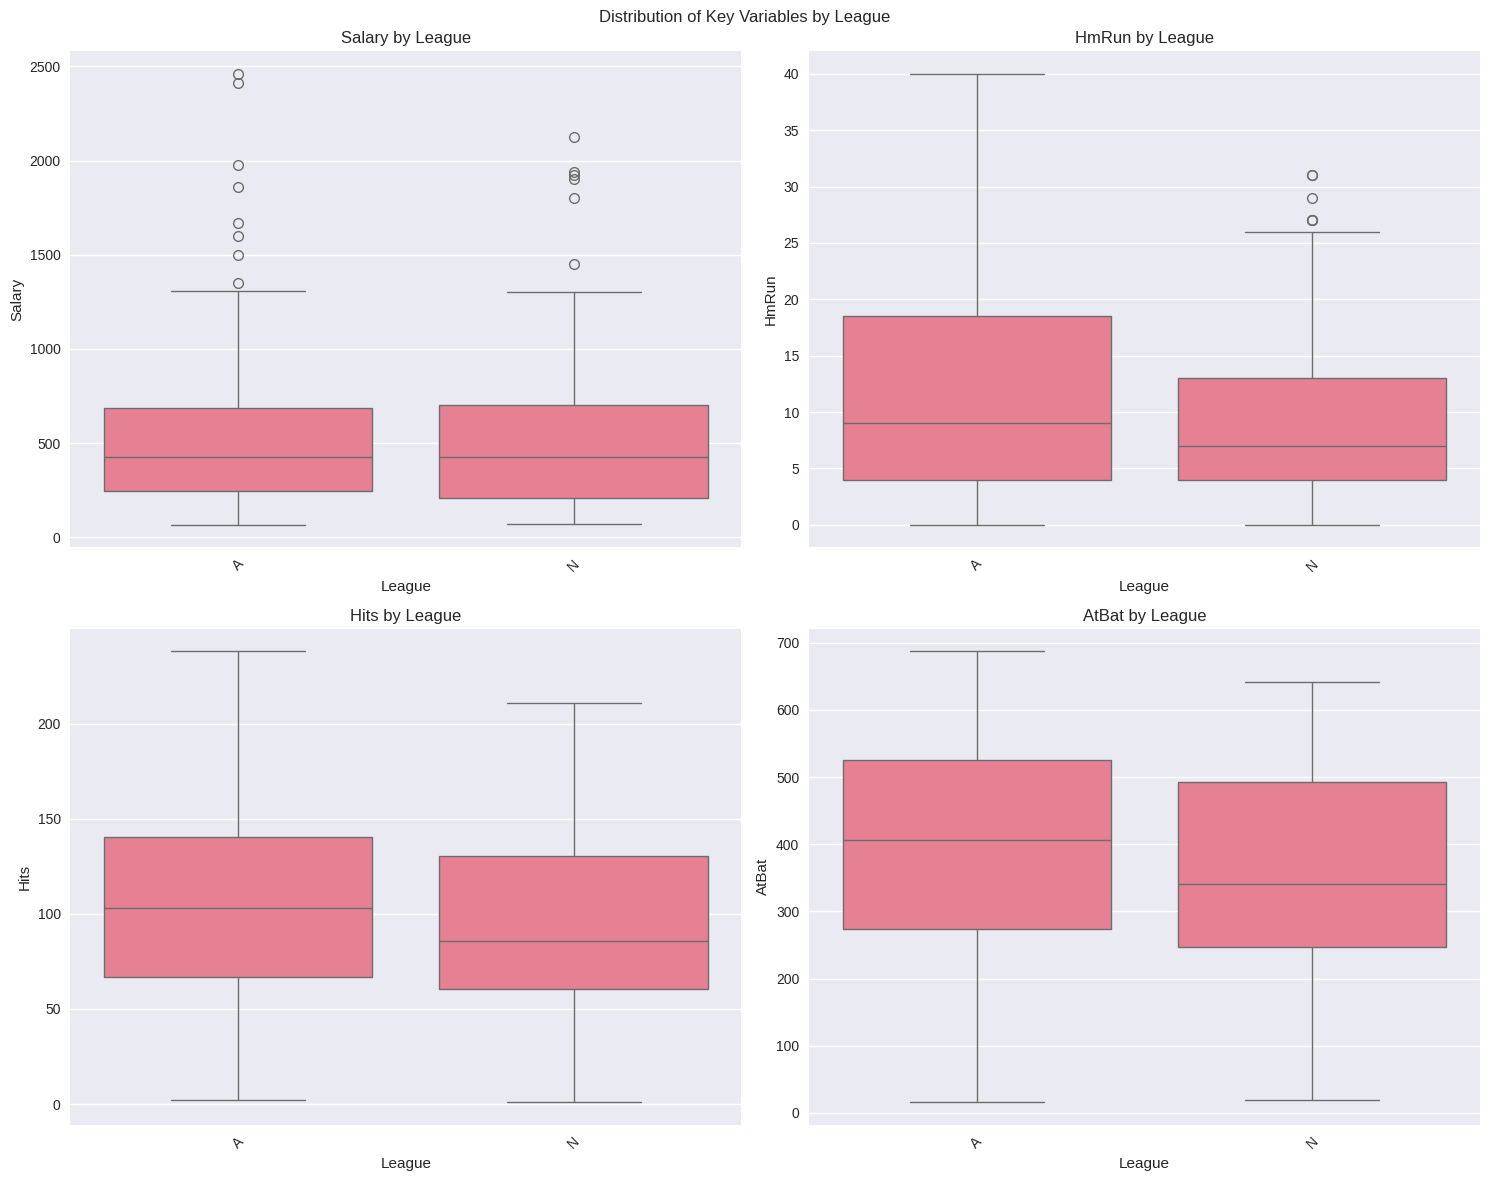

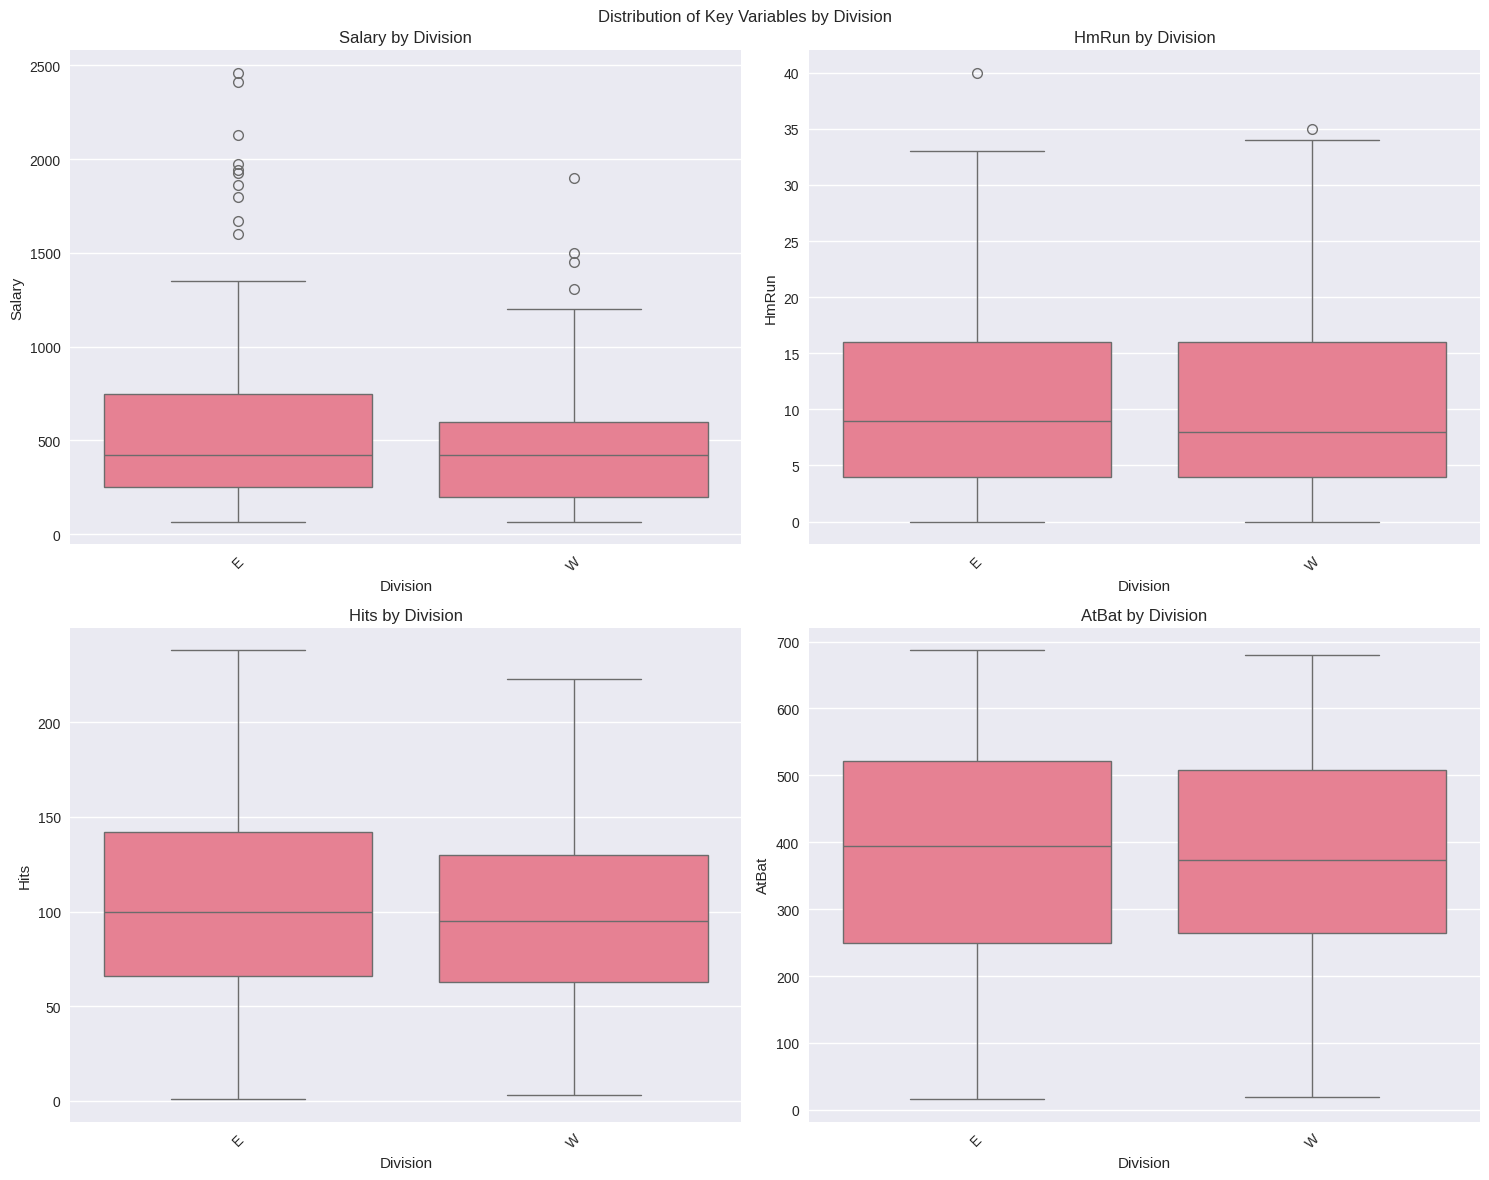

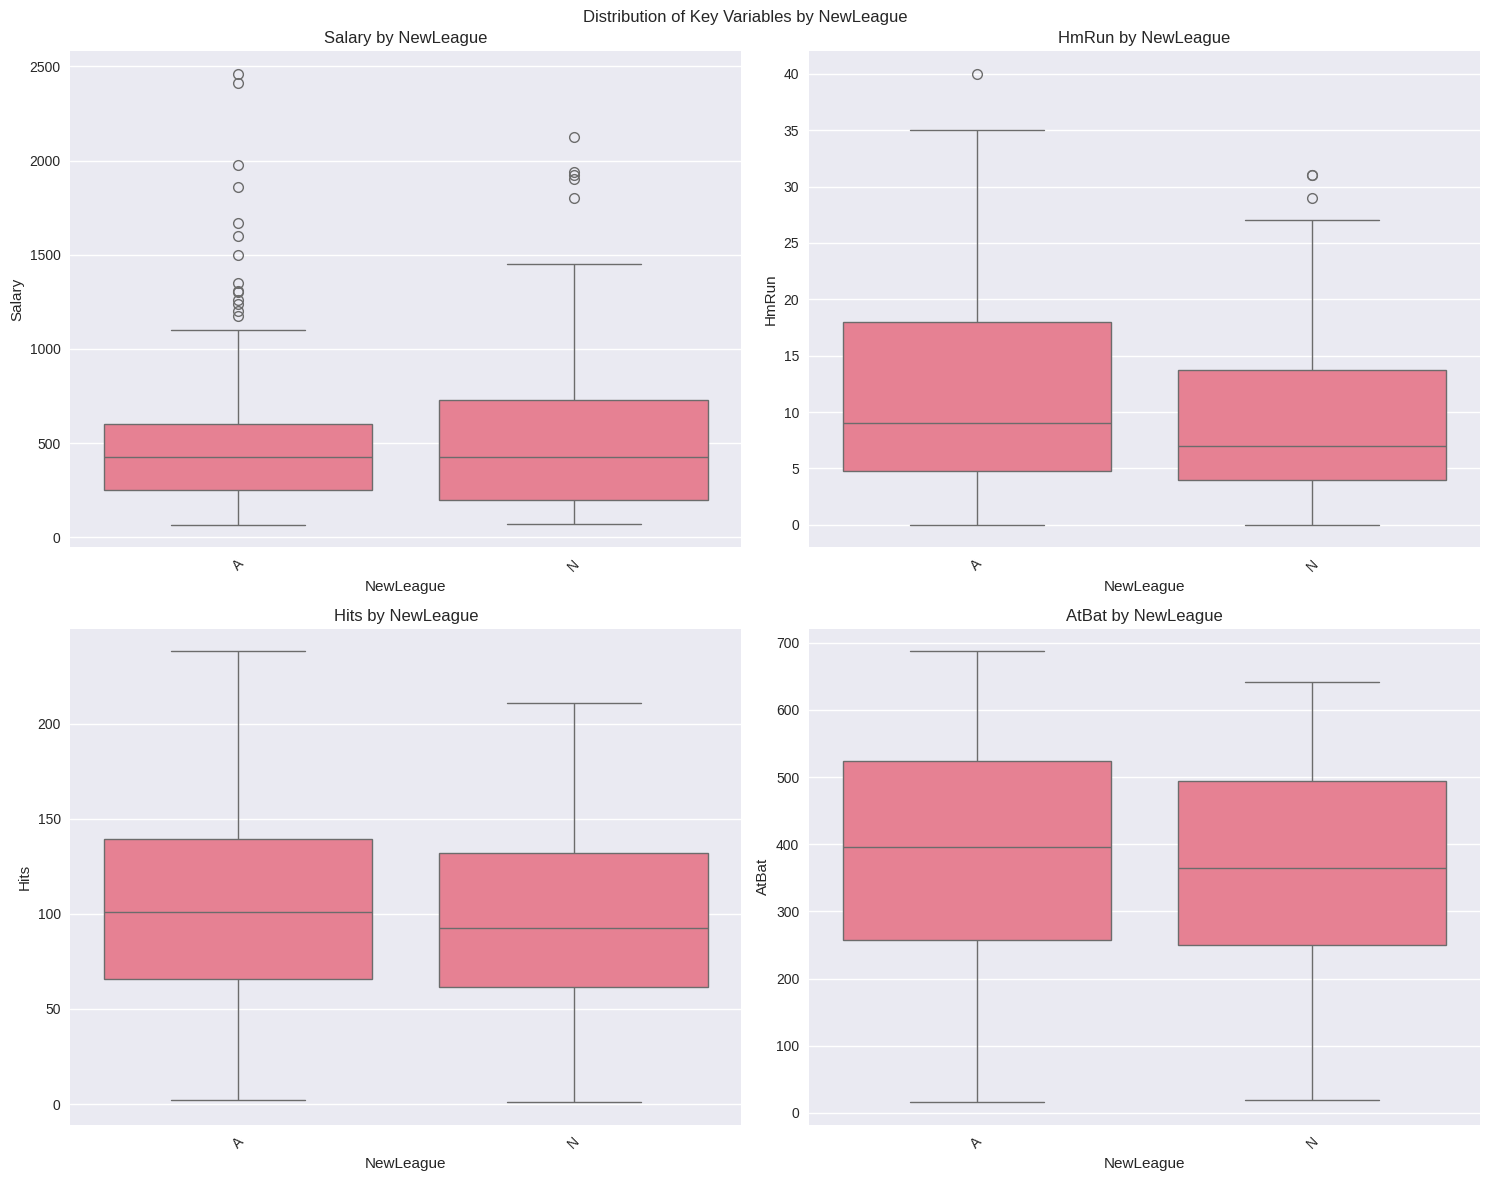

In [ ]:
print("BIVARIATE ANALYSIS - NUMERICAL vs CATEGORICAL")

# Select a few key numerical variables for analysis
key_numerical = ['Salary', 'HmRun', 'Hits', 'AtBat'][:4]  # Limit to 4 for display

for cat_col in categorical_cols:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()

    for i, num_col in enumerate(key_numerical):
        # Box plot
        sns.boxplot(data=df_cleaned, x=cat_col, y=num_col, ax=axes[i])
        axes[i].set_title(f'{num_col} by {cat_col}')
        axes[i].tick_params(axis='x', rotation=45)

    plt.suptitle(f'Distribution of Key Variables by {cat_col}')
    plt.tight_layout()
    plt.show()

In [ ]:
print("STATISTICAL TESTS")

# T-tests for numerical variables between categories
for cat_col in categorical_cols:
    categories = df_cleaned[cat_col].unique()
    if len(categories) == 2:
        print(f"\n=== T-tests for {cat_col} ===")
        for num_col in key_numerical:
            group1 = df_cleaned[df_cleaned[cat_col] == categories[0]][num_col]
            group2 = df_cleaned[df_cleaned[cat_col] == categories[1]][num_col]

            # Independent t-test
            t_stat, p_value = stats.ttest_ind(group1, group2)

            # Effect size (Cohen's d)
            pooled_std = np.sqrt(((len(group1) - 1) * group1.var() +
                                (len(group2) - 1) * group2.var()) /
                               (len(group1) + len(group2) - 2))
            cohens_d = (group1.mean() - group2.mean()) / pooled_std

            print(f"{num_col}: t={t_stat:.3f}, p={p_value:.3f}, Cohen's d={cohens_d:.3f}")

STATISTICAL TESTS

=== T-tests for League ===
Salary: t=0.111, p=0.912, Cohen's d=0.012
HmRun: t=3.222, p=0.001, Cohen's d=0.360
Hits: t=1.817, p=0.070, Cohen's d=0.203
AtBat: t=1.828, p=0.068, Cohen's d=0.205

=== T-tests for Division ===
Salary: t=3.167, p=0.002, Cohen's d=0.353
HmRun: t=0.308, p=0.758, Cohen's d=0.034
Hits: t=1.276, p=0.203, Cohen's d=0.142
AtBat: t=0.814, p=0.416, Cohen's d=0.091

=== T-tests for NewLeague ===
Salary: t=-0.038, p=0.970, Cohen's d=-0.004
HmRun: t=3.012, p=0.003, Cohen's d=0.337
Hits: t=1.086, p=0.278, Cohen's d=0.122
AtBat: t=1.033, p=0.302, Cohen's d=0.116


## Bivariate Analysis across different Correlation Calculation Methods

1. PEARSON CORRELATION MATRIX (Linear Relationships)
2. SPEARMAN CORRELATION MATRIX (Monotonic Relationships)
3. KENDALL'S TAU CORRELATION MATRIX (Rank-based)


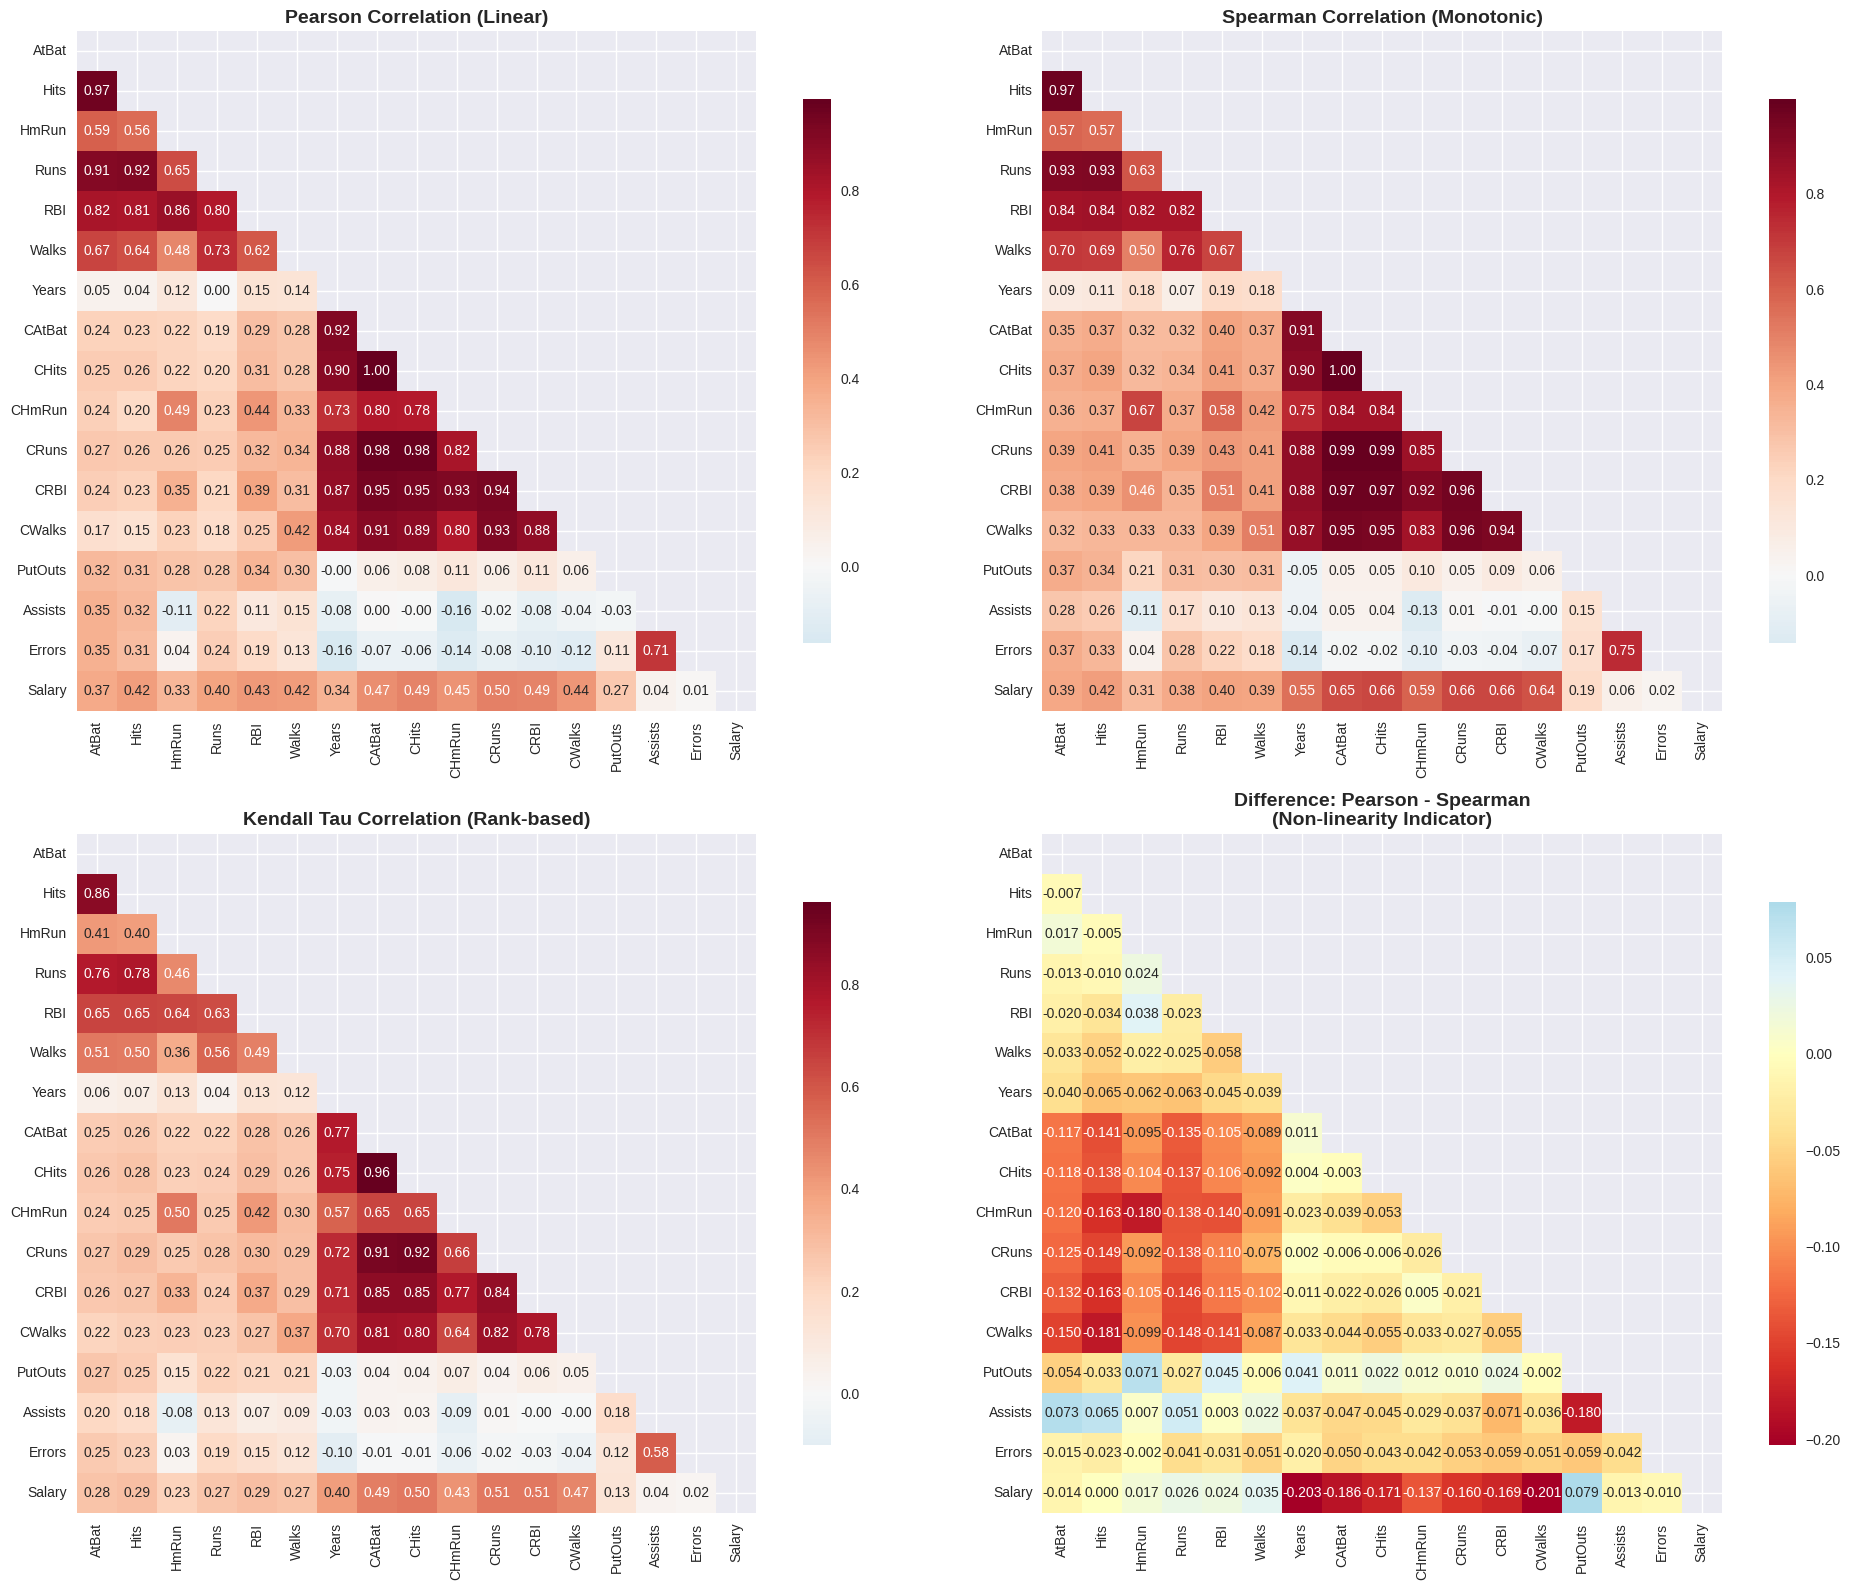

In [ ]:
# 1. Pearson Correlation (Linear relationships)
pearson_corr = df_cleaned[numerical_cols].corr(method='pearson')
print("1. PEARSON CORRELATION MATRIX (Linear Relationships)")
print("="*60)

# 2. Spearman Correlation (Monotonic relationships)
spearman_corr = df_cleaned[numerical_cols].corr(method='spearman')
print("2. SPEARMAN CORRELATION MATRIX (Monotonic Relationships)")
print("="*60)

# 3. Kendall's Tau Correlation (Rank-based, robust to outliers)
kendall_corr = df_cleaned[numerical_cols].corr(method='kendall')
print("3. KENDALL'S TAU CORRELATION MATRIX (Rank-based)")
print("="*60)

# Create comprehensive correlation comparison heatmaps
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Pearson correlation heatmap
mask = np.triu(np.ones_like(pearson_corr, dtype=bool))
sns.heatmap(pearson_corr, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8}, ax=axes[0,0])
axes[0,0].set_title('Pearson Correlation (Linear)', fontsize=14, fontweight='bold')

# Spearman correlation heatmap
sns.heatmap(spearman_corr, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8}, ax=axes[0,1])
axes[0,1].set_title('Spearman Correlation (Monotonic)', fontsize=14, fontweight='bold')

# Kendall correlation heatmap
sns.heatmap(kendall_corr, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8}, ax=axes[1,0])
axes[1,0].set_title('Kendall Tau Correlation (Rank-based)', fontsize=14, fontweight='bold')

# Correlation differences (Pearson vs Spearman)
corr_diff = pearson_corr - spearman_corr
sns.heatmap(corr_diff, mask=mask, annot=True, cmap='RdYlBu', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8}, ax=axes[1,1])
axes[1,1].set_title('Difference: Pearson - Spearman\n(Non-linearity Indicator)',
                    fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Find highly correlated pairs for detailed analysis
def find_high_correlations_all_methods(data, threshold=0.7):
    """Find high correlations using all methods"""
    results = []

    for method in ['pearson', 'spearman', 'kendall']:
        corr_matrix = data[numerical_cols].corr(method=method)

        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                if abs(corr_matrix.iloc[i, j]) >= threshold:
                    results.append({
                        'Variable1': corr_matrix.columns[i],
                        'Variable2': corr_matrix.columns[j],
                        'Method': method.capitalize(),
                        'Correlation': corr_matrix.iloc[i, j]
                    })

    return pd.DataFrame(results)

# Get high correlations for all methods
all_high_corr = find_high_correlations_all_methods(df_cleaned, 0.7)

print("4. HIGH CORRELATIONS BY METHOD (|r| >= 0.7)")
print("="*60)
if len(all_high_corr) > 0:
    # Pivot to show all methods side by side
    high_corr_pivot = all_high_corr.pivot_table(
        index=['Variable1', 'Variable2'],
        columns='Method',
        values='Correlation'
    ).round(3)
    print(high_corr_pivot)
else:
    print("No highly correlated pairs found.")

4. HIGH CORRELATIONS BY METHOD (|r| >= 0.7)
Method               Kendall  Pearson  Spearman
Variable1 Variable2                            
Assists   Errors         NaN    0.706     0.748
AtBat     Hits         0.865    0.968     0.975
          RBI            NaN    0.821     0.841
          Runs         0.765    0.913     0.926
          Walks          NaN      NaN     0.703
CAtBat    CHits        0.961    0.995     0.998
          CHmRun         NaN    0.799     0.838
          CRBI         0.854    0.949     0.971
          CRuns        0.911    0.983     0.989
          CWalks       0.807    0.907     0.950
CHits     CHmRun         NaN    0.783     0.836
          CRBI         0.854    0.945     0.971
          CRuns        0.917    0.985     0.991
          CWalks       0.798    0.891     0.946
CHmRun    CRBI         0.770    0.929     0.925
          CRuns          NaN    0.820     0.847
          CWalks         NaN    0.800     0.833
CRBI      CWalks       0.781    0.885     0.

## Multivariate Analysis

PAIR PLOT


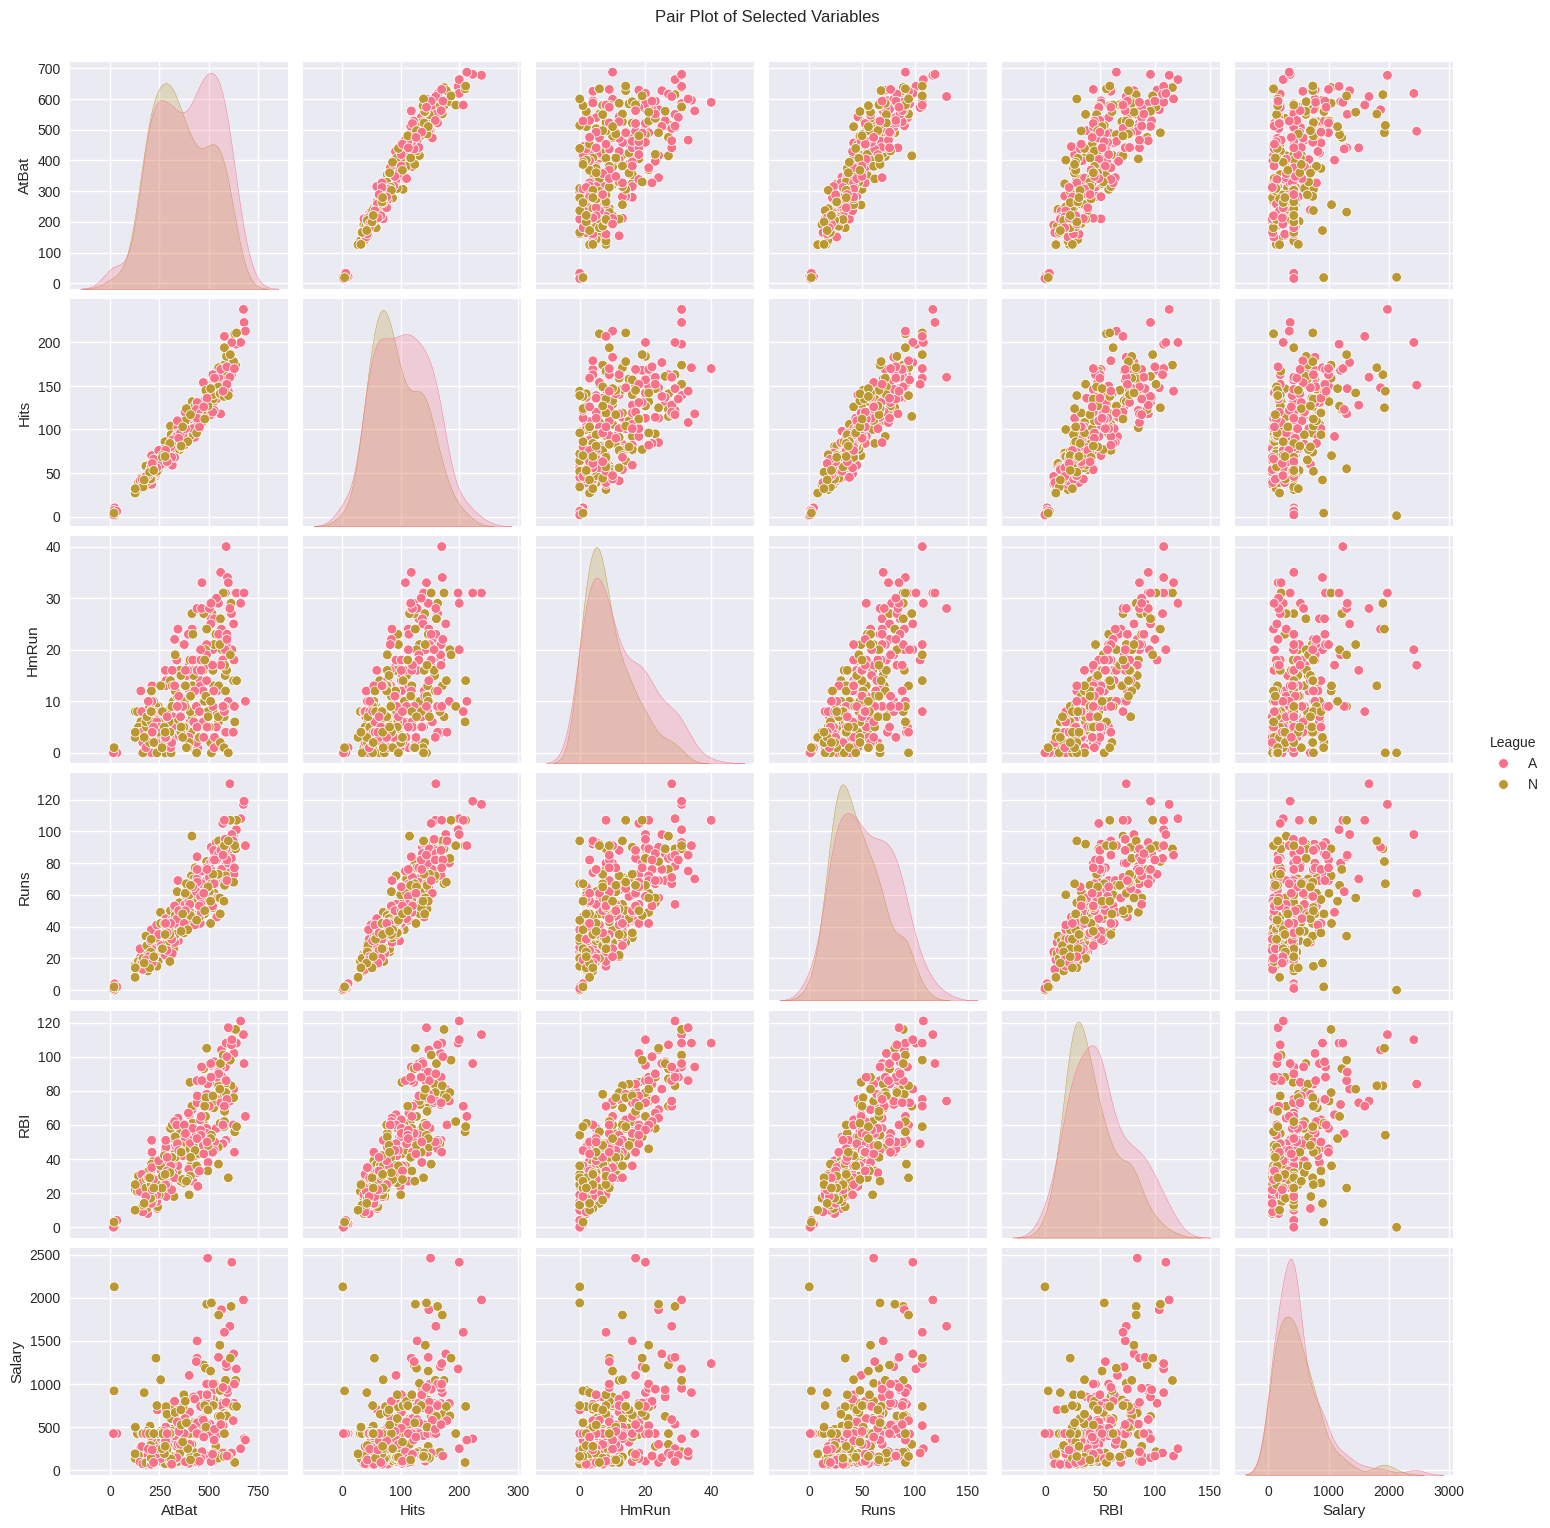

In [ ]:
print("PAIR PLOT")

# Select subset of variables for pair plot (to avoid overcrowding)
selected_vars = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Salary']
selected_vars = [var for var in selected_vars if var in df_cleaned.columns]

if len(selected_vars) > 2:
    # Create pair plot
    g = sns.pairplot(df_cleaned[selected_vars + ['League']],
                     hue='League', diag_kind='kde')
    g.fig.suptitle('Pair Plot of Selected Variables', y=1.02)
    plt.show()

PRINCIPAL COMPONENT ANALYSIS


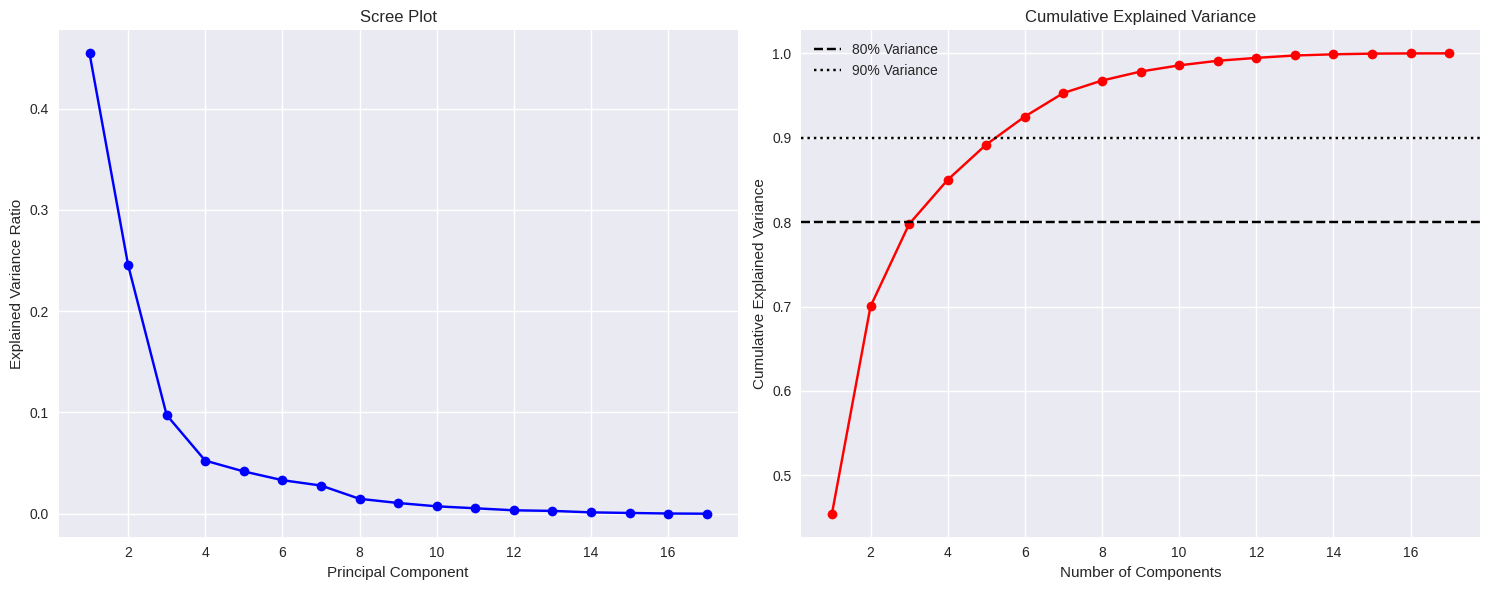

Number of components for 80% variance: 4
Number of components for 90% variance: 6


In [ ]:
print("PRINCIPAL COMPONENT ANALYSIS")

# Prepare data for PCA (numerical variables only)
pca_data = df_cleaned[numerical_cols].copy()

# Standardize the data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(pca_data_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scree plot
axes[0].plot(range(1, len(pca.explained_variance_ratio_) + 1),
             pca.explained_variance_ratio_, 'bo-')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Scree Plot')
axes[0].grid(True)

# Cumulative explained variance
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
axes[1].axhline(y=0.8, color='k', linestyle='--', label='80% Variance')
axes[1].axhline(y=0.9, color='k', linestyle=':', label='90% Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Explained Variance')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Print PCA summary
print(f"Number of components for 80% variance: {np.where(cumulative_variance >= 0.8)[0][0] + 1}")
print(f"Number of components for 90% variance: {np.where(cumulative_variance >= 0.9)[0][0] + 1}")

PCA LOADING ANALYSIS


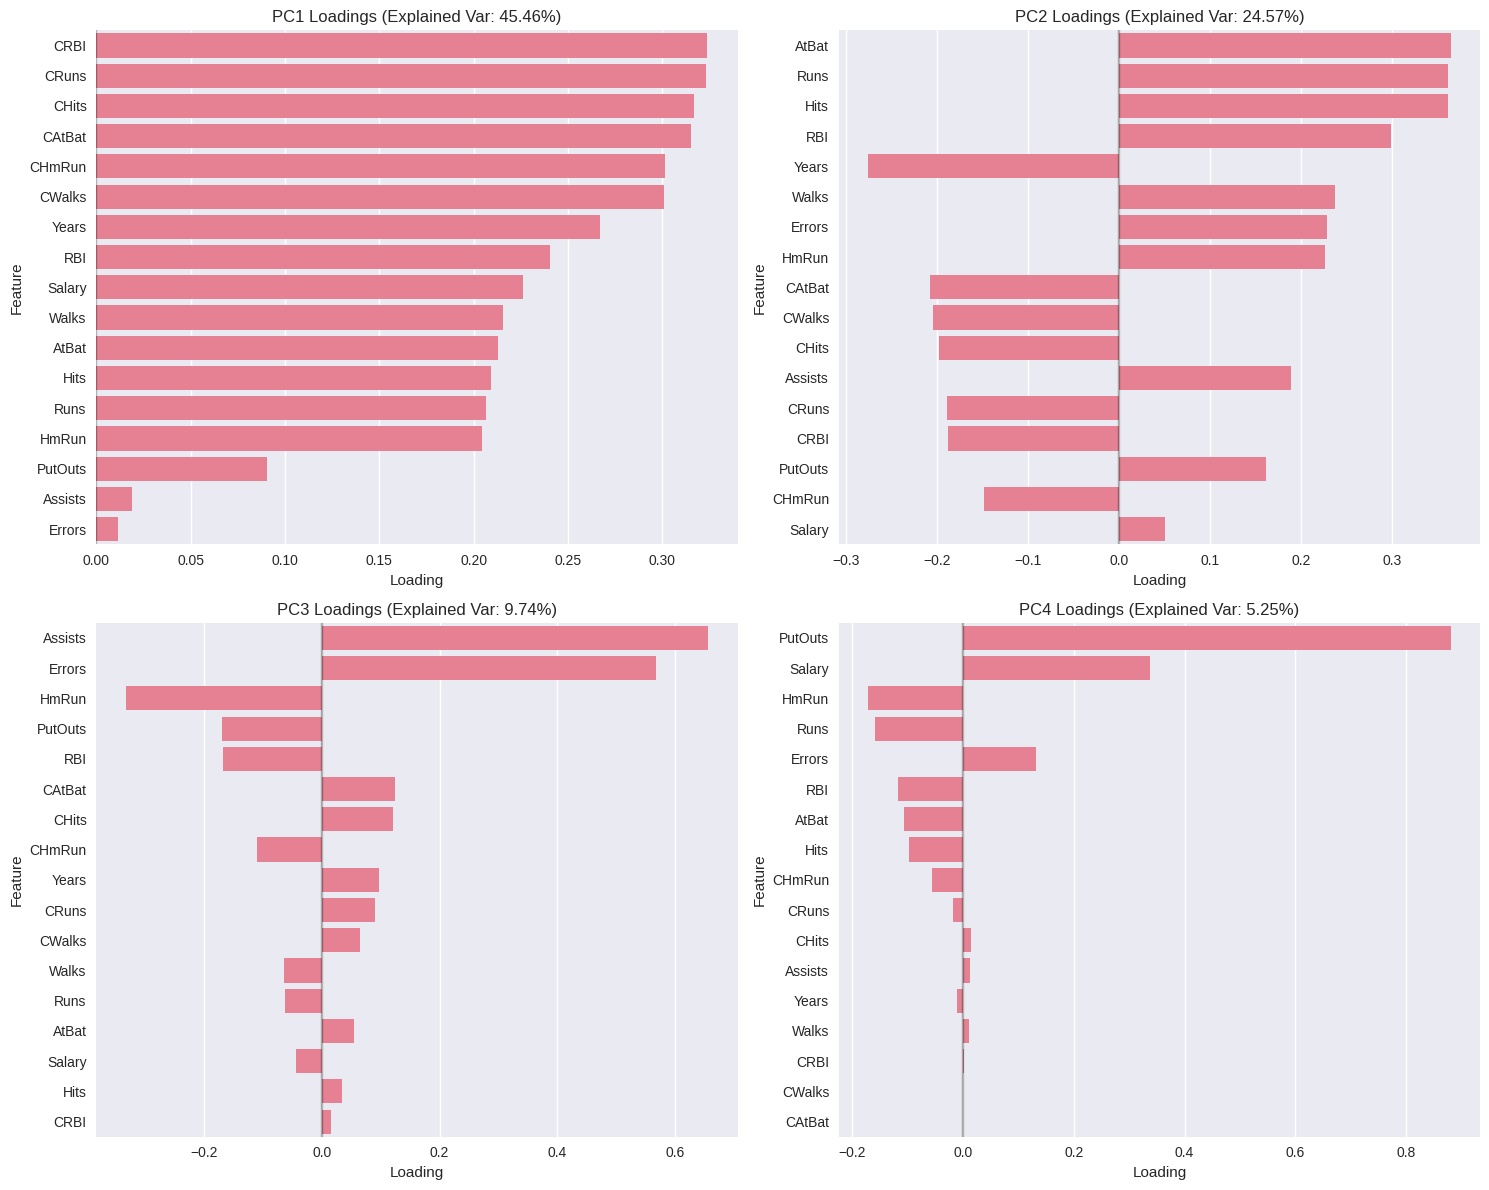

In [ ]:
print("PCA LOADING ANALYSIS")

# Get the loadings (components)
loadings = pca.components_[:4]  # First 4 components
feature_names = numerical_cols

# Create loading plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i in range(4):
    # Create loading plot for each component
    loading_df = pd.DataFrame({
        'Feature': feature_names,
        'Loading': loadings[i]
    }).sort_values('Loading', key=abs, ascending=False)

    sns.barplot(data=loading_df, x='Loading', y='Feature', ax=axes[i])
    axes[i].set_title(f'PC{i+1} Loadings (Explained Var: {pca.explained_variance_ratio_[i]:.2%})')
    axes[i].axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()


CLUSTER ANALYSIS USING K-MEANS CLUSTERING


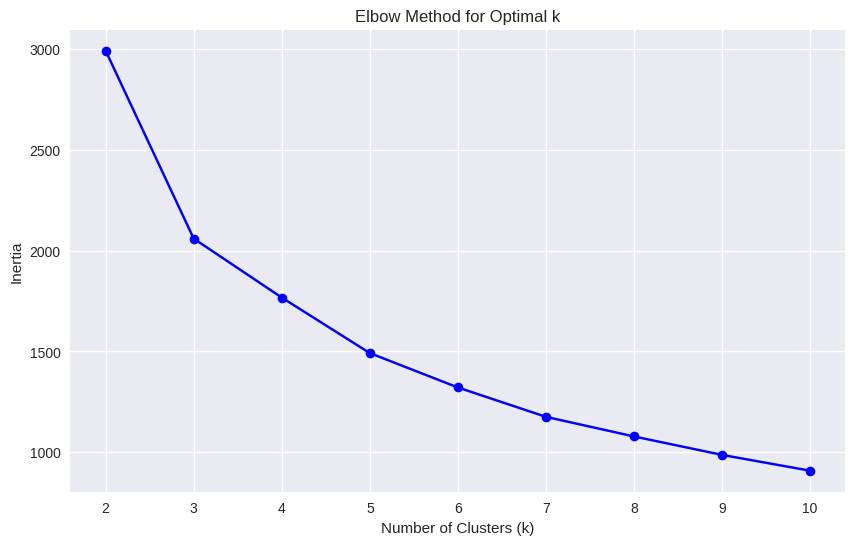

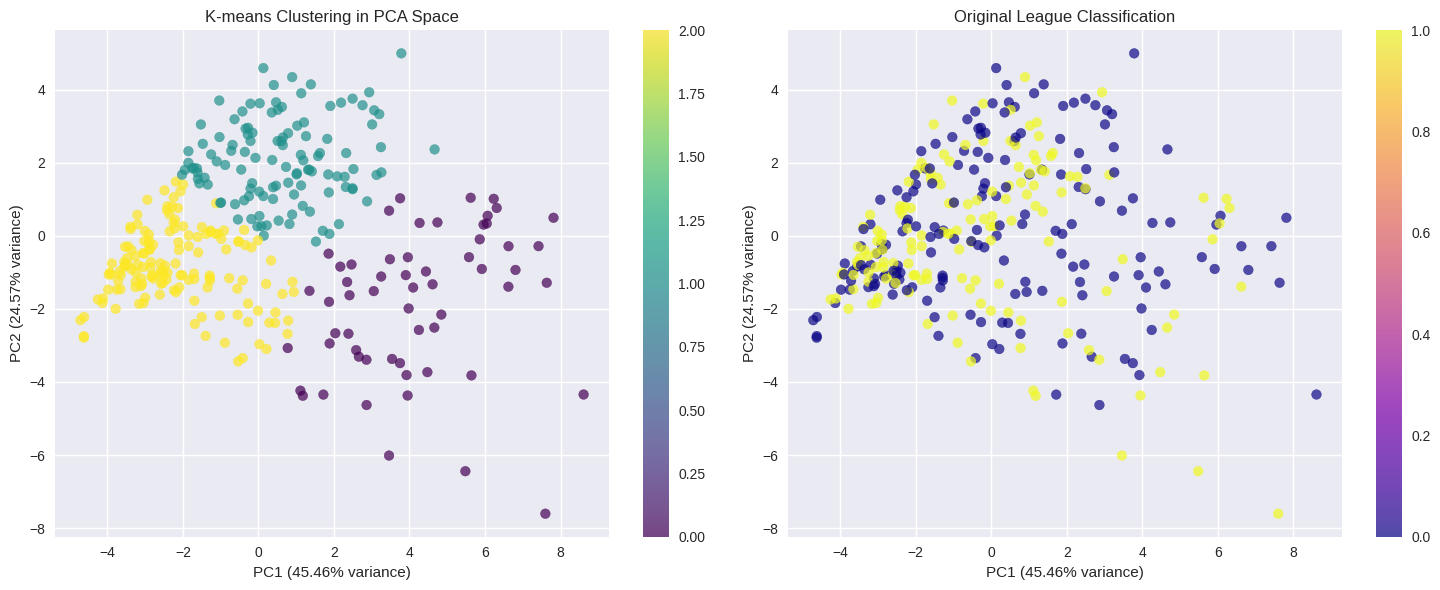

In [ ]:
print("CLUSTER ANALYSIS USING K-MEANS CLUSTERING")

# Use first few PCs for clustering to reduce dimensionality
n_components = np.where(cumulative_variance >= 0.8)[0][0] + 1
pca_for_clustering = pca_result[:, :n_components]

# Determine optimal number of clusters using elbow method
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_for_clustering)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Perform clustering with optimal k (let's use k=3 for demonstration)
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(pca_for_clustering)

# Add cluster labels to dataframe
df_cleaned['Cluster'] = cluster_labels

# Visualize clusters in PCA space
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Cluster visualization
scatter1 = axes[0].scatter(pca_result[:, 0], pca_result[:, 1],
                          c=cluster_labels, cmap='viridis', alpha=0.7)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[0].set_title('K-means Clustering in PCA Space')
plt.colorbar(scatter1, ax=axes[0])

# Original League visualization for comparison
scatter2 = axes[1].scatter(pca_result[:, 0], pca_result[:, 1],
                          c=df_cleaned['League'].map({'A': 0, 'N': 1}),
                          cmap='plasma', alpha=0.7)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[1].set_title('Original League Classification')
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()


In [ ]:
print("CLUSTER STATISTICAL COMPARISON")
for col in numerical_cols[:5]:  # Limit to first 5 for readability
    f_stat, p_val = stats.f_oneway(*[df_cleaned[df_cleaned['Cluster'] == i][col]
                                     for i in range(optimal_k)])
    print(f"{col}: F-statistic = {f_stat:.3f}, p-value = {p_val:.6f}")


CLUSTER STATISTICAL COMPARISON
AtBat: F-statistic = 248.363, p-value = 0.000000
Hits: F-statistic = 222.861, p-value = 0.000000
HmRun: F-statistic = 65.436, p-value = 0.000000
Runs: F-statistic = 191.388, p-value = 0.000000
RBI: F-statistic = 134.093, p-value = 0.000000


In [ ]:
print("3D VISUALIZATION OF CLUSTERS")

# 3D scatter plot using first three principal components
fig = go.Figure(data=[go.Scatter3d(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    z=pca_result[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cluster_labels,
        colorscale='Viridis',
        opacity=0.7,
        colorbar=dict(title="Cluster")
    ),
    text=[f"Player {i}<br>League: {league}<br>Cluster: {cluster}"
          for i, (league, cluster) in enumerate(zip(df_cleaned['League'], cluster_labels))],
    hovertemplate='<b>%{text}</b><br>' +
                  'PC1: %{x:.2f}<br>' +
                  'PC2: %{y:.2f}<br>' +
                  'PC3: %{z:.2f}<br>' +
                  '<extra></extra>'
)])

fig.update_layout(
    title='3D PCA Visualization with Clusters',
    scene=dict(
        xaxis_title=f'PC1 ({pca.explained_variance_ratio_[0]:.2%})',
        yaxis_title=f'PC2 ({pca.explained_variance_ratio_[1]:.2%})',
        zaxis_title=f'PC3 ({pca.explained_variance_ratio_[2]:.2%})'
    ),
    width=800,
    height=600
)

fig.show()

3D VISUALIZATION OF CLUSTERS


## Summary (Review 1)

In [ ]:
print("=== COMPREHENSIVE DATA ANALYSIS SUMMARY ===")

print("\n1. DATASET OVERVIEW:")
print(f"   • Dataset contains {df.shape[0]} observations and {df.shape[1]} variables")
print(f"   • {len(numerical_cols)} numerical and {len(categorical_cols)} categorical variables")
print(f"   • Missing values were found in {df.isnull().sum().sum()} cells and handled through imputation")

print("\n2. DATA QUALITY:")
print(f"   • Outliers detected using IQR method: {outlier_df['IQR_outliers'].sum()} total")
print(f"   • Outliers detected using Z-score method: {outlier_df['ZScore_outliers'].sum()} total")
print(f"   • No duplicate records found" if duplicates == 0 else f"   • {duplicates} duplicate records found")

print("\n3. UNIVARIATE ANALYSIS INSIGHTS:")
print("   • Distribution shapes vary across variables")
print("   • Normality tests indicate most variables are not normally distributed")
print(f"   • Categorical variables show the following distributions:")
for col in categorical_cols:
    value_counts = df_cleaned[col].value_counts()
    print(f"     - {col}: {dict(value_counts)}")

print("\n4. BIVARIATE ANALYSIS INSIGHTS:")
if len(high_corr) > 0:
    print(f"   • Found {len(high_corr)} highly correlated variable pairs (|r| >= 0.7)")
    print(f"   • Strongest correlation: {high_corr.iloc[0]['Variable1']} vs {high_corr.iloc[0]['Variable2']} (r = {high_corr.iloc[0]['Correlation']:.3f})")
else:
    print("   • No highly correlated variable pairs found (|r| >= 0.7)")

print("\n5. MULTIVARIATE ANALYSIS INSIGHTS:")
print(f"   • PCA shows that {n_components} components explain 80% of the variance")
print(f"   • K-means clustering identified {optimal_k} distinct groups in the data")
print(f"   • Clusters show different performance profiles:")
for i in range(optimal_k):
    cluster_size = (df_cleaned['Cluster'] == i).sum()
    print(f"     - Cluster {i}: {cluster_size} players ({cluster_size/len(df_cleaned)*100:.1f}%)")


=== COMPREHENSIVE DATA ANALYSIS SUMMARY ===

1. DATASET OVERVIEW:
   • Dataset contains 322 observations and 20 variables
   • 17 numerical and 3 categorical variables
   • Missing values were found in 59 cells and handled through imputation

2. DATA QUALITY:
   • Outliers detected using IQR method: 182.0 total
   • Outliers detected using Z-score method: 50.0 total
   • No duplicate records found

3. UNIVARIATE ANALYSIS INSIGHTS:
   • Distribution shapes vary across variables
   • Normality tests indicate most variables are not normally distributed
   • Categorical variables show the following distributions:
     - League: {'A': np.int64(175), 'N': np.int64(147)}
     - Division: {'W': np.int64(165), 'E': np.int64(157)}
     - NewLeague: {'A': np.int64(176), 'N': np.int64(146)}

4. BIVARIATE ANALYSIS INSIGHTS:
   • Found 30 highly correlated variable pairs (|r| >= 0.7)
   • Strongest correlation: CAtBat vs CHits (r = 0.995)

5. MULTIVARIATE ANALYSIS INSIGHTS:
   • PCA shows that 4 com